# Data collection and processing

In [ ]:
#Understood
# For local runtime
import tensorflow
physical_devices = tensorflow.config.experimental.list_physical_devices('GPU')
assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
config = tensorflow.config.experimental.set_memory_growth(physical_devices[0], True)

In [ ]:
!pip install gdown opencv-python-headless pandas numpy sklearn pillow scipy keras pydot graphviz lime

     |████████████████████████████████| 47.7 MB 1.9 MB/s 
     |████████████████████████████████| 275 kB 55.2 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=57e2902ca6b10c74416fa5cbd507acd058ef5c49382dc6094a240ff360de1162
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime


In [ ]:
import tensorflow as tf
import gdown
import os
# Directory
directory = "data"
# Parent Directory path
parent_dir = "/content"
path = os.path.join(parent_dir, directory)
os.mkdir(path)

images_1_url = 'https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/zr7vgbcyr2-1.zip'
#data_directory = "./data/"
# os.mkdir( data_directory )

gdown.download( images_1_url, path, quiet=False)

Downloading...
From: https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/zr7vgbcyr2-1.zip
To: /content/data
100%|██████████| 3.59G/3.59G [01:00<00:00, 59.0MB/s]


'/content/data'

In [ ]:
import zipfile
with zipfile.ZipFile( '/content/data/data7rfuri1etmp', 'r') as zip_ref:
      zip_ref.extractall( './data' )

In [ ]:
import os
os.remove('/content/data/data7rfuri1etmp')

In [ ]:
# extract image sets from zip files into ./data/ directory
import zipfile
from pathlib import Path
data_directory = '/content/data/images/'
def extract_and_move( zip_file, subdir ):
  with zipfile.ZipFile( zip_file, 'r') as zip_ref:
      zip_ref.extractall( data_directory )

  for each_file in Path(subdir).glob('*.*'): # grabs all files
    trg_path = each_file.parent.parent # gets the parent of the folder 
    each_file.rename(trg_path.joinpath(each_file.name)) # moves to parent folder.

# extract zip file data, and move the contents to the data directory

# if the training takes too long, you can just comment one or two of these out and we'll just work on a subset of the images
extract_and_move( data_directory + "imgs_part_1.zip", data_directory + "imgs_part_1")
extract_and_move( data_directory + "imgs_part_2.zip", data_directory + "imgs_part_2")
extract_and_move( data_directory + "imgs_part_3.zip", data_directory + "imgs_part_3")

In [ ]:
from glob import glob
images = glob('/content/data/images/'+'*.png')
len(images) # number of extracted images

2298

In [ ]:
os.remove('./data/images/imgs_part_1.zip')
os.remove('./data/images/imgs_part_2.zip')
os.remove('./data/images/imgs_part_3.zip')

In [ ]:
!pip install opencv-python-headless==4.1.2.30

     |████████████████████████████████| 21.8 MB 1.5 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.62
    Uninstalling opencv-python-headless-4.5.5.62:
      Successfully uninstalled opencv-python-headless-4.5.5.62


In [ ]:
# Standardize image data

image_shape = (224,224,3)  # VGG16,ResNet50,InceptionV3:  (224,224)

import os
import cv2

for file in os.listdir( os.fsencode( data_directory ) ):

  fname = os.fsdecode(file)
  fpath = data_directory + fname  # full file path
  
  img = cv2.imread( fpath )
  
  if img is None:
    print( "Not an image, skipping: {}".format(fpath) )
    continue
  img = cv2.resize( img, image_shape[:2] )
  cv2.imwrite( fpath, img )


In [ ]:
# READ METADATA.CSV to DATAFRAME
import pandas as pd
import numpy as np

# set pandas options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv( './data/' + 'metadata.csv')
df.infer_objects()
print(df.head(25))

   patient_id  lesion_id  smoke  drink background_father background_mother  age pesticide  gender skin_cancer_history cancer_history has_piped_water has_sewage_system  fitspatrick   region  diameter_1  diameter_2 diagnostic   itch   grew   hurt changed  bleed elevation                 img_id  biopsed
0    PAT_1516       1765    NaN    NaN               NaN               NaN    8       NaN     NaN                 NaN            NaN             NaN               NaN          NaN      ARM         NaN         NaN        NEV  False  False  False   False  False     False  PAT_1516_1765_530.png    False
1      PAT_46        881  False  False         POMERANIA         POMERANIA   55     False  FEMALE                True           True            True              True          3.0     NECK         6.0         5.0        BCC   True   True  False    True   True      True     PAT_46_881_939.png     True
2    PAT_1545       1867    NaN    NaN               NaN               NaN   77       NaN     

In [ ]:
# if we didn't extract all of the files above, 
#   drop all df rows where we don't have the corresponding image file

import os

indices_to_drop=[]
for row in df.itertuples():
  if not os.path.isfile("./data/images/{}".format( row.img_id ) ):
    indices_to_drop.append( row.Index )

print( "Removing {} of {} samples".format( len(indices_to_drop), df.shape[0] ) )

df.drop( indices_to_drop, inplace=True )
print(df.head(10))

Removing 0 of 2298 samples
  patient_id  lesion_id  smoke  drink background_father background_mother  age pesticide  gender skin_cancer_history cancer_history has_piped_water has_sewage_system  fitspatrick   region  diameter_1  diameter_2 diagnostic   itch   grew   hurt changed  bleed elevation                 img_id  biopsed
0   PAT_1516       1765    NaN    NaN               NaN               NaN    8       NaN     NaN                 NaN            NaN             NaN               NaN          NaN      ARM         NaN         NaN        NEV  False  False  False   False  False     False  PAT_1516_1765_530.png    False
1     PAT_46        881  False  False         POMERANIA         POMERANIA   55     False  FEMALE                True           True            True              True          3.0     NECK         6.0         5.0        BCC   True   True  False    True   True      True     PAT_46_881_939.png     True
2   PAT_1545       1867    NaN    NaN               NaN               

In [ ]:
# List the different diagnostic results, and their quantities
print(df.diagnostic.value_counts())

"""
Skin diseases:
ACK:  Actinic Keratosis
NEV:  Nevus
SEK:  Seborrheic Keratosis

Skin cancers:
BCC:  Basal Cell Carcinoma
MEL:  Melanoma
SCC:  Squamous Cell Carcinoma
"""

BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: diagnostic, dtype: int64


'\nSkin diseases:\nACK:  Actinic Keratosis\nNEV:  Nevus\nSEK:  Seborrheic Keratosis\n\nSkin cancers:\nBCC:  Basal Cell Carcinoma\nMEL:  Melanoma\nSCC:  Squamous Cell Carcinoma\n'

In [15]:
# Clean/standardize metadata
def describe_dataframe( df, n=25 ):
  "Prints stuff about a dataframe"
  column_types = dict(df.dtypes)  # get dict of column types
  print("COLUMNS:")
  i = 0
  for k,v in column_types.items():
    print("{}: {}, type={}".format( i, k, v ) )
    i += 1
  print(df.head(n))

describe_dataframe( df )

COLUMNS:
0: patient_id, type=object
1: lesion_id, type=int64
2: smoke, type=object
3: drink, type=object
4: background_father, type=object
5: background_mother, type=object
6: age, type=int64
7: pesticide, type=object
8: gender, type=object
9: skin_cancer_history, type=object
10: cancer_history, type=object
11: has_piped_water, type=object
12: has_sewage_system, type=object
13: fitspatrick, type=float64
14: region, type=object
15: diameter_1, type=float64
16: diameter_2, type=float64
17: diagnostic, type=object
18: itch, type=object
19: grew, type=object
20: hurt, type=object
21: changed, type=object
22: bleed, type=object
23: elevation, type=object
24: img_id, type=object
25: biopsed, type=bool
   patient_id  lesion_id  smoke  drink background_father background_mother  age pesticide  gender skin_cancer_history cancer_history has_piped_water has_sewage_system  fitspatrick   region  diameter_1  diameter_2 diagnostic   itch   grew   hurt changed  bleed elevation                 img_id  b

In [16]:
# Type conversion, missing value imputation, scaling

import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# conversions:
#   gender to binary
if df.gender.dtype==np.object:
  df.gender=df.gender.replace( 'FEMALE', False )
  df.gender=df.gender.replace( 'MALE', True )

# numeric columns get mean, categorical columns get most frequent
string_cols = []
numeric_cols = []
bool_cols = ['gender', 'smoke','drink','skin_cancer_history','cancer_history','itch','grew','hurt','changed','bleed','elevation','has_piped_water','has_sewage_system']

bool_cols_idx = df[bool_cols].select_dtypes(include=[np.object]).columns  # bool cols not yet converted
if bool_cols_idx.any():
  df[bool_cols_idx]= df[bool_cols_idx].replace({'UNK':np.nan, 'False':False, 'True':True})
  df[bool_cols_idx] = SimpleImputer( missing_values=np.nan, strategy="most_frequent" ).fit_transform( df[bool_cols_idx] )
  df[bool_cols_idx] = df[bool_cols_idx].astype(bool)

for col in df.columns:
  if col in bool_cols:
    continue
  if df.dtypes[ col ] == np.object:
    string_cols.append( col )
  else:
    numeric_cols.append( col )

# string cols: most frequent
string_cols = df.select_dtypes(include=[np.object]).columns
df[string_cols] = SimpleImputer( strategy="most_frequent" ).fit_transform( df[string_cols] )

# numeric cols:  median + scale
numeric_cols = df.select_dtypes(include=[np.int,np.float]).columns
df[numeric_cols] = SimpleImputer( missing_values=np.nan, strategy="median" ).fit_transform( df[numeric_cols] )
df[numeric_cols] = StandardScaler().fit_transform( df[numeric_cols] )

bool_cols = df.select_dtypes(include=[bool]).columns
df[bool_cols]=df[bool_cols].astype(np.int32)

describe_dataframe( df )

COLUMNS:
0: patient_id, type=object
1: lesion_id, type=float64
2: smoke, type=int32
3: drink, type=int32
4: background_father, type=object
5: background_mother, type=object
6: age, type=float64
7: pesticide, type=int32
8: gender, type=int32
9: skin_cancer_history, type=int32
10: cancer_history, type=int32
11: has_piped_water, type=int32
12: has_sewage_system, type=int32
13: fitspatrick, type=float64
14: region, type=object
15: diameter_1, type=float64
16: diameter_2, type=float64
17: diagnostic, type=object
18: itch, type=int32
19: grew, type=int32
20: hurt, type=int32
21: changed, type=int32
22: bleed, type=int32
23: elevation, type=int32
24: img_id, type=object
25: biopsed, type=int32
   patient_id  lesion_id  smoke  drink background_father background_mother       age  pesticide  gender  skin_cancer_history  cancer_history  has_piped_water  has_sewage_system  fitspatrick   region  diameter_1  diameter_2 diagnostic  itch  grew  hurt  changed  bleed  elevation                 img_id  b

In [17]:
# Encode labels
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# region to categorical
if df.region.dtype==np.object:
  print('Region conversion:')
  print( df.region.value_counts() )
  df.region=LabelEncoder().fit_transform(df.region)
  print( df.region.value_counts() )

# binary encoding
print('Diagnostic (binary):')
df["diagnostic_binary"]=np.where( ( df.diagnostic=='BCC' ) | ( df.diagnostic=='SCC' ) | ( df.diagnostic=='MEL'), 1, 0 )
print(df.diagnostic_binary.value_counts())

# categorical encoding
diagnostic_categorical_map = {"ACK":0, "NEV":1, "SEK":2, "BCC":3, "SCC":4, "MEL":5}
df["diagnostic_categorical"] = df.diagnostic.map( diagnostic_categorical_map )
print('Diagnostic (categorical):')
print(df.diagnostic_categorical.value_counts())

NUM_CLASSES = len(np.unique(df.diagnostic_categorical))
print("Have {} classes".format(NUM_CLASSES))
print(diagnostic_categorical_map)

Region conversion:
FACE       570
FOREARM    392
CHEST      280
BACK       248
ARM        192
NOSE       158
HAND       126
NECK        93
THIGH       73
EAR         73
ABDOMEN     36
LIP         23
SCALP       18
FOOT        16
Name: region, dtype: int64
5     570
7     392
3     280
2     248
1     192
11    158
8     126
10     93
13     73
4      73
0      36
9      23
12     18
6      16
Name: region, dtype: int64
Diagnostic (binary):
0    1209
1    1089
Name: diagnostic_binary, dtype: int64
Diagnostic (categorical):
3    845
0    730
1    244
2    235
4    192
5     52
Name: diagnostic_categorical, dtype: int64
Have 6 classes
{'ACK': 0, 'NEV': 1, 'SEK': 2, 'BCC': 3, 'SCC': 4, 'MEL': 5}


In [18]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        original = X.copy()
        output =  pd.concat([X, X], ignore_index=True)

        if self.columns is not None:
            output['all'] = pd.concat([original[self.columns[0]],original[self.columns[1]]], ignore_index=True)
            for col in self.columns:
                output['converted'] = LabelEncoder().fit_transform(output['all'])

        original['background_father_converted'] = output['converted'].to_numpy()[:original.shape[0]]
        original.drop(['background_father','background_mother'],axis = 1,inplace=True)
        original['background_mother_converted'] = output['converted'].to_numpy()[:original.shape[0]]

        return original

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)


df = MultiColumnLabelEncoder(columns = ['background_father','background_mother']).fit_transform(df)

In [19]:
df.head(10)

,patient_id,lesion_id,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,diagnostic_binary,diagnostic_categorical,background_father_converted,background_mother_converted
0,PAT_1516,0.196539,0,0,-3.301454,0,0,0,1,1,1,-0.287388,1,-0.175732,-0.118127,NEV,0,0,0,0,0,0,PAT_1516_1765_530.png,0,0,1,11,11
1,PAT_46,-0.542575,0,0,-0.343881,0,0,1,1,1,1,1.376130,10,-0.745672,-0.757749,BCC,1,1,0,1,1,1,PAT_46_881_939.png,1,1,3,11,11
2,PAT_1545,0.281822,0,0,1.040515,0,0,0,1,1,1,-0.287388,5,-0.175732,-0.118127,ACK,1,0,0,0,0,0,PAT_1545_1867_547.png,0,0,0,11,11
3,PAT_1989,2.116231,0,0,0.914661,0,0,0,1,1,1,-0.287388,8,-0.175732,-0.118127,ACK,1,0,0,0,0,0,PAT_1989_4061_934.png,0,0,0,11,11
4,PAT_684,-0.190576,0,1,1.166369,0,1,1,0,0,0,-1.950906,7,-0.888157,-0.757749,BCC,1,1,0,0,1,1,PAT_684_1302_588.png,1,1,3,11,11
5,PAT_1549,0.294363,0,0,-0.469735,0,0,0,1,1,1,-0.287388,3,-0.175732,-0.118127,SEK,1,0,0,0,0,1,PAT_1549_1882_230.png,0,0,2,11,11
6,PAT_778,-0.049275,0,1,-0.532662,0,0,0,1,1,1,1.376130,5,0.536694,0.308288,BCC,0,1,0,1,1,1,PAT_778_1471_835.png,1,1,3,5,5
7,PAT_117,-1.129519,0,0,0.851734,1,0,0,0,0,0,-1.950906,5,0.536694,0.308288,BCC,1,1,1,0,1,1,PAT_117_179_983.png,1,1,3,11,11
8,PAT_1995,2.132117,0,0,0.474171,0,0,0,1,1,1,-0.287388,7,-0.175732,-0.118127,ACK,1,0,0,1,0,0,PAT_1995_4080_695.png,0,0,0,11,11
9,PAT_705,2.077771,0,1,-0.155100,1,0,1,1,1,1,-1.950906,7,-0.318217,-0.331334,ACK,0,1,0,0,0,0,PAT_705_4015_413.png,0,0,0,5,5


In [20]:
# Train/test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split( df, test_size=0.15, random_state=42, stratify=df[['diagnostic_binary','diagnostic_categorical']] )

print("Train stratification:")
print(df_train.shape)
print(df_train.diagnostic_binary.value_counts())
print(df_train.diagnostic_categorical.value_counts())

print("Test stratification:")
print(df_test.shape)
print(df_test.diagnostic_binary.value_counts())
print(df_test.diagnostic_categorical.value_counts())

Train stratification:
(1953, 28)
0    1028
1     925
Name: diagnostic_binary, dtype: int64
3    718
0    621
1    207
2    200
4    163
5     44
Name: diagnostic_categorical, dtype: int64
Test stratification:
(345, 28)
0    181
1    164
Name: diagnostic_binary, dtype: int64
3    127
0    109
1     37
2     35
4     29
5      8
Name: diagnostic_categorical, dtype: int64


In [21]:
def prep_directory( path, classes ):
  if not os.path.isdir(path):
    os.mkdir(path)
    os.mkdir(path + 'train/')
    os.mkdir(path + 'test/')
    for cls in classes:
      os.mkdir(path + 'train/{}/'.format( cls ))
      os.mkdir(path + 'test/{}/'.format( cls ))  

# Prepare the data directory for flow_from_directory
data_directory_binary = data_directory+'binary/'
data_directory_binary_train = data_directory_binary + 'train/'
data_directory_binary_test = data_directory_binary + 'test/'

data_directory_categorical = data_directory +'categorical/'
data_directory_categorical_train = data_directory_categorical +'train/'
data_directory_categorical_test = data_directory_categorical +'test/'

prep_directory( data_directory_binary, ["0","1"] )
prep_directory( data_directory_categorical, ["0","1", "2","3","4","5"] )

for file in os.listdir( os.fsencode( data_directory ) ):

  fname = os.fsdecode(file)
  fpath = data_directory + fname  # full file path
  
  img = cv2.imread( fpath )
  
  if img is None:
    print( "Not an image, skipping: {}".format(fpath) )
    continue

  # is this in train or test data?

  train_dir = 'train/'
  test_dir = 'test/'
  dir = train_dir
  row = df_train.loc[df_train['img_id']==fname]
  if row.empty:
    dir = test_dir
    row = df_test.loc[df_test['img_id']==fname]
  assert not row.empty
  
  binary_val = row.diagnostic_binary.values[0]
  categorical_val = row.diagnostic_categorical.values[0]

  # link the file in the correct folders
  link_path_binary = "{}{}{}/{}".format( data_directory_binary, dir, binary_val, fname )
  link_path_categorical = "{}{}{}/{}".format( data_directory_categorical, dir, categorical_val, fname )
  
  if not os.path.exists( link_path_binary ):
    os.link( fpath, link_path_binary )

  if not os.path.exists( link_path_categorical ):
    os.link( fpath, link_path_categorical )

  # unlink the file if it exists in the 'other' folder
  link_path_binary_other = "{}{}{}/{}".format( data_directory_binary, train_dir if dir == test_dir else test_dir, binary_val, fname )
  link_path_categorical_other = "{}{}{}/{}".format( data_directory_categorical, train_dir if dir == test_dir else test_dir, categorical_val, fname )
  if os.path.exists( link_path_binary_other ):
    os.unlink( link_path_binary_other )

  if os.path.exists( link_path_categorical_other ):
    os.unlink( link_path_categorical_other )

  

Not an image, skipping: /content/data/images/imgs_part_3
Not an image, skipping: /content/data/images/binary
Not an image, skipping: /content/data/images/categorical
Not an image, skipping: /content/data/images/imgs_part_1
Not an image, skipping: /content/data/images/imgs_part_2


In [22]:
# Create sample weights for X_meta_train; Keras can't currently handle class weighting of multi-output models

# remap of class:weight
weight_factors_binary = { 0:1, 1:1000 }

# overweight cancers, especially SCC (4) and MEL (5)
weight_factors_categorical = { 0:1, 1:1, 2:1, 3:100, 4:250, 5:1000 }

X_train_sample_weights = df.diagnostic_categorical.map( weight_factors_categorical )
print("Sample weights:")
print(X_train_sample_weights.value_counts())


Sample weights:
1       1209
100      845
250      192
1000      52
Name: diagnostic_categorical, dtype: int64


In [23]:
# remove labels, non-informative columns, and clinical data from df_train/test
#   background_* columns are regionally-specific to dataset

columns_to_drop = ['patient_id', 'lesion_id', 'diagnostic', 'img_id', 'background_mother_converted', 
                   'background_father_converted', 'diagnostic_binary', 'diagnostic_categorical',
                   'pesticide', 'biopsed'
                   ]
X_meta_train = df_train.drop( columns=columns_to_drop, errors='ignore' )
X_meta_test = df_test.drop( columns=columns_to_drop, errors='ignore' )
print("Meta train:")
describe_dataframe( X_meta_train, 25 )

Meta train:
COLUMNS:
0: smoke, type=int32
1: drink, type=int32
2: age, type=float64
3: gender, type=int32
4: skin_cancer_history, type=int32
5: cancer_history, type=int32
6: has_piped_water, type=int32
7: has_sewage_system, type=int32
8: fitspatrick, type=float64
9: region, type=int64
10: diameter_1, type=float64
11: diameter_2, type=float64
12: itch, type=int32
13: grew, type=int32
14: hurt, type=int32
15: changed, type=int32
16: bleed, type=int32
17: elevation, type=int32
      smoke  drink       age  gender  skin_cancer_history  cancer_history  has_piped_water  has_sewage_system  fitspatrick  region  diameter_1  diameter_2  itch  grew  hurt  changed  bleed  elevation
23        0      0  0.411244       0                    0               1                1                  1    -0.287388       5   -0.175732   -0.118127     1     0     0        0      0          1
1198      0      0  0.788807       0                    0               1                1                  1    -0.28738

In [24]:
# For categorical_crossentropy loss: convert labels to one-hot vectors
import tensorflow as tf
import keras.utils
#Y_multiclass = keras.utils.to_categorical( df.diagnostic_multiclass, len(np.unique(df.diagnostic_multiclass)))  # categorical data

# Create labels
y_train_binary = pd.DataFrame( df_train.diagnostic_binary )
y_train_categorical = tf.keras.utils.to_categorical( df_train.diagnostic_categorical, NUM_CLASSES )  # categorical data
print(y_train_binary.shape)
print(y_train_categorical.shape)

y_test_binary = pd.DataFrame( df_test.diagnostic_binary )
y_test_categorical = tf.keras.utils.to_categorical( df_test.diagnostic_categorical, NUM_CLASSES )  # categorical data
print(y_test_binary.shape)
print(y_test_categorical.shape)


(1953, 1)
(1953, 6)
(345, 1)
(345, 6)


In [25]:
import pandas as pd

def get_df_for_files( files ):
  "Utility function to get a dataframe for the specified list of files, in the specified order"

  file_names = pd.Series(files).str.split("/", expand=True)[1]
  result = df[df.img_id.isin( file_names )]
  return result.set_index('img_id').loc[file_names].reset_index(inplace=False)
  

## Print Images of different diagnosis

In [ ]:
print(df.diagnostic.value_counts())

"""
Skin diseases:
ACK:  Actinic Keratosis
NEV:  Nevus
SEK:  Seborrheic Keratosis

Skin cancers:
BCC:  Basal Cell Carcinoma
MEL:  Melanoma
SCC:  Squamous Cell Carcinoma
"""
print(df.diagnostic_categorical.value_counts())


BCC    845
ACK    730
NEV    244
SEK    235
SCC    192
MEL     52
Name: diagnostic, dtype: int64
3    845
0    730
1    244
2    235
4    192
5     52
Name: diagnostic_categorical, dtype: int64


In [ ]:
d = {0:'ACK',1:'NEV',2:'SEK',3:'BCC',4:'SCC',5:'MEL'}

ACK


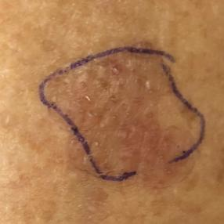

NEV


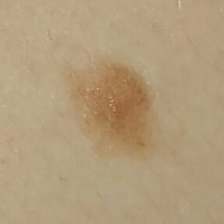

SEK


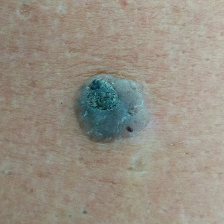

BCC


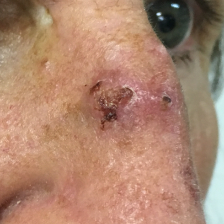

SCC


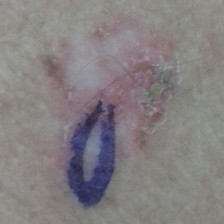

MEL


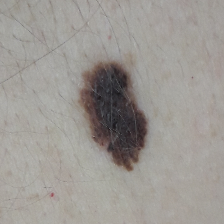

In [ ]:
import os
import cv2
from google.colab.patches import cv2_imshow

d = {0:'ACK',1:'NEV',2:'SEK',3:'BCC',4:'SCC',5:'MEL'}

for i in range(6):
  directory = os.fsencode('/content/data/images/categorical/train/{}'.format(i))
  for file in os.listdir(directory):
    filename = os.fsdecode(file)
    full_path = str(directory)[2:-1]+('/{}'.format(str(filename)))
    img = cv2.imread(full_path)
    print('{}'.format(d[i]))
    cv2_imshow(img)
    break
  continue

## Some plots

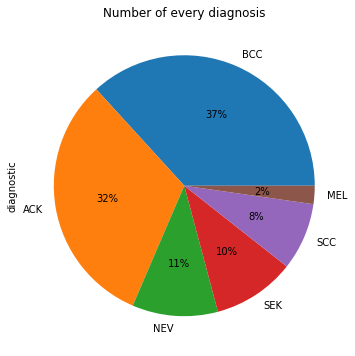

In [26]:
import matplotlib.pyplot as plt

diagnosis = df['diagnostic'].value_counts()
diagnosis.plot(x=diagnosis.index, y=diagnosis, kind='pie', figsize=(10,6), autopct='%1.0f%%');
plt.title('Number of every diagnosis');


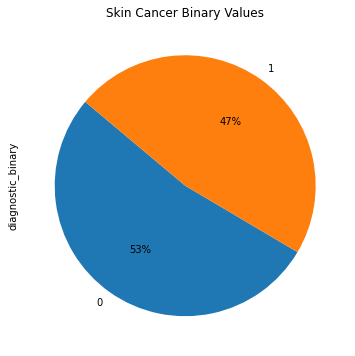

In [36]:
diagnosis = df['diagnostic_binary'].value_counts()
diagnosis.plot(x=diagnosis.index, y=diagnosis, kind='pie', figsize=(10,6), autopct='%1.0f%%',startangle = 140);
plt.title('Skin Cancer Binary Values');

# Previous Work

## Meta classifier

In [ ]:
import matplotlib.pyplot as plt

def plot_train_and_val( history ):

  plt.plot(history.history['output_binary_accuracy'])
  plt.plot(history.history['val_output_binary_accuracy'])
  plt.title('Model accuracy (binary)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['output_binary_loss'])
  plt.plot(history.history['val_output_binary_loss'])
  plt.title('Model loss (binary)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['output_categorical_accuracy'])
  plt.plot(history.history['val_output_categorical_accuracy'])
  plt.title('Model accuracy (categorical)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['output_categorical_loss'])
  plt.plot(history.history['val_output_categorical_loss'])
  plt.title('Model loss (categorical)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

Model: "meta_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 nn_input (InputLayer)          [(None, 18)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           1216        ['nn_input[0][0]']               
                                                                                                  
 dropout (Dropout)              (None, 64)           0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dropout[0][0]']                
                                                                                         

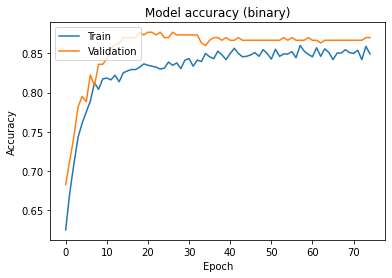

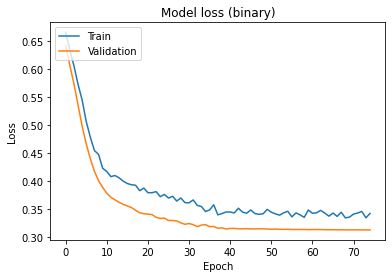

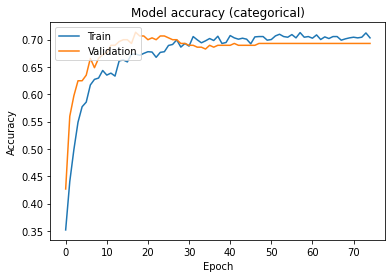

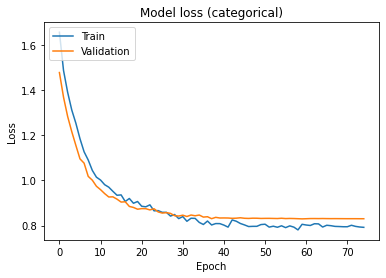

In [ ]:
from keras.models import Model
from keras import layers
import tensorflow
def get_nn_model( input_shape ):
  input = layers.Input( shape=input_shape, name='nn_input' )

  # with sample_weights
  #x = layers.Dense( 512, activation='relu' )( input )
  #x = layers.Dropout( 0.7 )( x )
  #x = layers.Dense( 512, activation='relu' )( x )
  #x = layers.Dropout( 0.7 )( x )
  
  # without sample weights
  x = layers.Dense( 64, activation='relu' )( input )
  x = layers.Dropout( 0.15 )( x )
  x = layers.Dense( 64, activation='relu' )( x )

  output_binary = layers.Dense(1, activation='sigmoid', name='output_binary' )( x )
  output_cat = layers.Dense( NUM_CLASSES, activation='softmax', name='output_categorical' )( x )
  return Model(inputs=[input], outputs=[output_binary, output_cat], name='meta_model')

meta_model = get_nn_model( X_meta_train.shape[1:] )
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.00025 )
losses = { "output_binary": tensorflow.keras.losses.BinaryCrossentropy(), 
          "output_categorical": tensorflow.keras.losses.CategoricalCrossentropy() }
meta_model.compile(optimizer=opt, loss=losses, metrics=['accuracy'] )
print(meta_model.summary())

epochs = 75

stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)
callbacks=[learning_rate_reduction]

meta_history = meta_model.fit( x= np.array( X_meta_train ), y=[np.array( y_train_binary ), np.array( y_train_categorical )], 
               epochs=epochs, callbacks=callbacks, validation_split=0.15 , verbose=1 #, sample_weight=X_train_sample_weights 
               )

plot_train_and_val( meta_history )

In [ ]:
import sklearn

# eval weighting
#scores = meta_model.evaluate( X_meta_test, [y_test_binary, y_test_categorical], return_dict=True )

# get y_true, y_hat
y_pred_binary, y_pred_categorical = meta_model.predict( X_meta_test )

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid
y_pred_categorical = np.argmax( y_pred_categorical, axis=1 )

# get confusion matrix
tn, fp, fn, tp = sklearn.metrics.confusion_matrix( y_test_binary, y_pred_binary ).ravel()
result={}
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( y_test_binary, y_pred_binary, average="weighted" )

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print( sklearn.metrics.classification_report( y_test_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       181
           1       0.79      0.79      0.79       164

    accuracy                           0.80       345
   macro avg       0.80      0.80      0.80       345
weighted avg       0.80      0.80      0.80       345

PPV: 0.79
Sensitivity: 0.79
Specificity: 0.81


In [ ]:
# support function for training and evaluating a scikit learn model
def evalSklModel( m, x_train_, y_train_, x_test_, y_test_ ):
  m.fit( x_train_, y_train_ )

  # Predict on validation set
  pred = m.predict( x_test_ )
  pred_prob = m.predict_proba( x_test_ )
 
  # print accuracy
  print( "Accuracy: %.4f" % accuracy_score( y_test_, pred ) )

  confusion_mtx = confusion_matrix( y_test_, pred )
  np.set_printoptions(precision=2)
  plot_confusion_matrix( confusion_mtx, ["0", "1","2","3","4","5"], normalize=True)

  print(classification_report( y_test_, pred))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

print ("Random forest (binary):")
rfc_train_x, rfc_val_x, rfc_train_y, rfc_val_y = train_test_split( X_meta_train, y_train_binary, stratify=y_train_binary, random_state=42, test_size=0.2 )
rfc = RandomForestClassifier()
rfc.fit( rfc_train_x, rfc_train_y )
y_pred = rfc.predict( rfc_val_x )
print( "Accuracy: %.4f" % accuracy_score( rfc_val_y, y_pred ) )

print ("Random forest (categorical):")
rfc_train_x, rfc_val_x, rfc_train_y, rfc_val_y = train_test_split( X_meta_train, y_train_categorical, stratify=y_train_categorical, random_state=42, test_size=0.2 )
rfc = RandomForestClassifier()
rfc.fit( rfc_train_x, rfc_train_y )
y_pred = rfc.predict( rfc_val_x )
print( "Accuracy: %.4f" % accuracy_score( rfc_val_y, y_pred ) )


Random forest (binary):


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.8849
Random forest (categorical):
Accuracy: 0.7519


## Image classifier

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator

class MultiOutputDataGenerator(DirectoryIterator):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        image_files = pd.Series(self.filenames)
        image_files = image_files.str.split("/", expand=True)[1]
        self.image_files = image_files
        #print(image_files)

        # the current dataframe we're processing
        self.current_batch = None

    def _get_batches_of_transformed_samples(self, index_array):
        X, y = super()._get_batches_of_transformed_samples(index_array)

        # match image file names with dataframe
        batch_df = df[df.img_id.isin(self.image_files[index_array])]
        batch_df = batch_df.set_index('img_id').loc[self.image_files[index_array]].reset_index(inplace=False)
        
        y0 = np.array( batch_df.diagnostic_binary )
        y1 = tf.keras.utils.to_categorical( batch_df.diagnostic_categorical, NUM_CLASSES )  # categorical data

        self.current_batch = batch_df
        # debug
        #print(batch_df)
        #print(y0)
        #print(y1)

        return (X, [y0,y1])

In [ ]:
# TODO:  reevaluate
# resnet 50 base val_loss:  ~1.15
from tensorflow.keras.applications.resnet50 import preprocess_input as image_preprocessing_function
from tensorflow.keras.applications import ResNet50 as base_network
#first_finetune_layer = 143 # 0: 1.2

# InceptionV3 base val_loss:  ~1.35
#from tensorflow.keras.applications.inception_v3 import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import InceptionV3 as base_network
#first_finetune_layer = 249 #"conv2d_93"

# VGG19 base val_loss: ~1.3
#from tensorflow.keras.applications.vgg19 import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import VGG19 as base_network
#first_finetune_layer = 17

# VGG16 base val_loss: ~1.45
#from tensorflow.keras.applications.vgg16 import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import VGG16 as base_network
#first_finetune_layer = 15

# densenet201:  ~1.25
#from tensorflow.keras.applications.densenet import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import DenseNet201 as base_network
#first_finetune_layer = 481

# xception: ~1.5+
#from tensorflow.keras.applications.xception import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import Xception as base_network
#first_finetune_layer = 126

# NasNetMobile: ~1.5+
#from tensorflow.keras.applications.nasnet import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import NASNetMobile as base_network
#first_finetune_layer = 734

# InceptionResNetv2:  ~1.3
#from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import InceptionResNetV2 as base_network
#first_finetune_layer = 607

# ResNet101 : 1.25
#from tensorflow.keras.applications.resnet import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import ResNet101 as base_network
#first_finetune_layer = 313

# ResNet50v2:  1.5
#from tensorflow.keras.applications.resnet_v2 import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import ResNet50V2 as base_network
#first_finetune_layer = 154

# ResNet101:  ~1.2
#from tensorflow.keras.applications.resnet import preprocess_input as image_preprocessing_function
#from tensorflow.keras.applications import ResNet101 as base_network
#first_finetune_layer = 313

# print base network architecture
base = base_network(weights='imagenet', include_top=False, input_shape= image_shape )
print( base.summary() )
for i,layer in enumerate( base.layers ):
  print("{}: {}".format(i,layer.name))


94781440/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = image_shape[:2]
BATCH_SIZE = 32
SEED=55

# augmented image data generator
datagen = ImageDataGenerator(preprocessing_function=image_preprocessing_function,
                                   validation_split = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='nearest')

train_batches = MultiOutputDataGenerator( data_directory_binary_train, datagen,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=SEED,
                                                  class_mode="binary"
                                                  )

# no augmentation for validation data, but keep same seed and validation_split
datagen_val = ImageDataGenerator(preprocessing_function=image_preprocessing_function, validation_split=0.2)

valid_batches = MultiOutputDataGenerator( data_directory_binary_train, datagen_val,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=SEED,
                                                  class_mode="binary"
                                                  )

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

print(len(train_batches))
print(len(valid_batches))

Found 1563 images belonging to 2 classes.
Found 390 images belonging to 2 classes.
49
13


In [ ]:
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from keras.models import Model
from keras import layers
import tensorflow

def get_cnn( base_network, image_shape ):
  "return CNN with frozen base network"
  input_1 = layers.Input( shape=image_shape, name='cnn_input' )
  conv_base = base_network(weights='imagenet',
                    include_top=False,
                    input_shape= input_1.shape[1:] )
  conv_base.trainable = False  # freeze
  #print(conv_base.summary())
  conv_base_input = conv_base( input_1, training=False )
  #x = layers.Flatten()( conv_base_input )
  #x = layers.Dropout( 0.6 )( x )
  #x = layers.Dense( 256, activation='relu' )( x )
  x = layers.GlobalAveragePooling2D()( conv_base_input )
  x = layers.Dropout(0.75, name='cnn_dropout')(x)  # Regularize with dropout
  output_1 = layers.Dense(1, activation='sigmoid', name='cnn_output_binary')( x )
  output_2 = layers.Dense( NUM_CLASSES, activation='softmax', name='cnn_output_categorical')( x )
  return Model(inputs=input_1, outputs=[output_1,output_2], name='cnn_model'), conv_base

tensorflow.keras.backend.clear_session()

#opt=keras.optimizers.Adam(lr=0.00002)
opt=tf.keras.optimizers.Adam()
#opt=keras.optimizers.SGD(lr=2e-5, momentum=0.9)

cnn_model, cnn_model_base = get_cnn( base_network, image_shape )
losses = { "cnn_output_binary": tensorflow.keras.losses.BinaryCrossentropy(from_logits=True), 
          "cnn_output_categorical": tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True) }
cnn_model.compile(optimizer=opt, loss=losses, metrics=['accuracy'] )

print(cnn_model.summary())


Model: "cnn_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cnn_input (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['cnn_input[0][0]']              
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['resnet50[0][0]']               
 alAveragePooling2D)                                                                              
                                                                                          

In [ ]:
# Initial training on top layers

epochs = 10

cnn_model.fit( train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= epochs              
                       )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48/48 [==============================] - 354s 7s/step - loss: 3.6221 - cnn_output_binary_loss: 1.0716 - cnn_output_categorical_loss: 2.5504 - cnn_output_binary_accuracy: 0.5591 - cnn_output_categorical_accuracy: 0.3527 - val_loss: 1.7950 - val_cnn_output_binary_loss: 0.5308 - val_cnn_output_categorical_loss: 1.2642 - val_cnn_output_binary_accuracy: 0.7604 - val_cnn_output_categorical_accuracy: 0.5599
Epoch 2/10
48/48 [==============================] - 335s 7s/step - loss: 2.9716 - cnn_output_binary_loss: 0.8432 - cnn_output_categorical_loss: 2.1284 - cnn_output_binary_accuracy: 0.6068 - cnn_output_categorical_accuracy: 0.4154 - val_loss: 1.5751 - val_cnn_output_binary_loss: 0.4708 - val_cnn_output_categorical_loss: 1.1042 - val_cnn_output_binary_accuracy: 0.8099 - val_cnn_output_categorical_accuracy: 0.6432
Epoch 3/10
48/48 [==============================] - 329s 7s/step - loss: 2.5968 - cnn_output_binary_loss: 0.7790 - cnn_output_categorical_loss: 1.8177 - cnn_output_binary_accuracy: 

In [ ]:
# Fine tune 
cnn_model_base.trainable = True  # unfreeze conv_base
#if not first_finetune_layer is None:
  #cnn_model_base.trainable = True  # unfreeze conv_base
  #for layer in cnn_model_base.layers[:first_finetune_layer]:
  #  layer.trainable=False

  #for layer in cnn_model_base.layers[first_finetune_layer:]:
  #  layer.trainable=True
  #  print("Setting layer {} to trainable".format(layer.name))

#print(conv_base.summary())
opt = tf.keras.optimizers.Adam(lr=0.000005)
cnn_model.compile(optimizer=opt, loss=losses, metrics=['accuracy'] )
print(cnn_model.summary())

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
 
callbacks=[stop_early,learning_rate_reduction]
epochs = 100

cnn_history = cnn_model.fit(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= epochs,
                        callbacks=callbacks
                       )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "cnn_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cnn_input (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['cnn_input[0][0]']              
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['resnet50[0][0]']               
 alAveragePooling2D)                                                                              
                                                                                          

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48/48 [==============================] - 60s 887ms/step - loss: 3.1858 - cnn_output_binary_loss: 0.8504 - cnn_output_categorical_loss: 2.3354 - cnn_output_binary_accuracy: 0.5434 - cnn_output_categorical_accuracy: 0.2743 - val_loss: 2.1166 - val_cnn_output_binary_loss: 0.6326 - val_cnn_output_categorical_loss: 1.4840 - val_cnn_output_binary_accuracy: 0.6536 - val_cnn_output_categorical_accuracy: 0.4505 - lr: 5.0000e-06
Epoch 2/100
48/48 [==============================] - 39s 806ms/step - loss: 2.3563 - cnn_output_binary_loss: 0.7144 - cnn_output_categorical_loss: 1.6419 - cnn_output_binary_accuracy: 0.5669 - cnn_output_categorical_accuracy: 0.3625 - val_loss: 1.9976 - val_cnn_output_binary_loss: 0.5994 - val_cnn_output_categorical_loss: 1.3982 - val_cnn_output_binary_accuracy: 0.7292 - val_cnn_output_categorical_accuracy: 0.4922 - lr: 5.0000e-06
Epoch 3/100
48/48 [==============================] - 41s 842ms/step - loss: 2.1951 - cnn_output_binary_loss: 0.6758 - cnn_output_categorical_l

## Stacked model training

In [ ]:
# ConcatDataGenerator
#   Combines the image data with the associated metadata, returns two outputs
# based on https://github.com/keras-team/keras/issues/8130#issuecomment-336855177
#   and https://stackoverflow.com/a/54918559

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator

class ConcatDataGenerator(MultiOutputDataGenerator):

  def _get_batches_of_transformed_samples(self, index_array):
    "override, return extra input"
    result = super()._get_batches_of_transformed_samples(index_array)
    sample_weights = self._get_current_batch_sample_weights()
    return (*result, self.current_batch.drop( columns=columns_to_drop, errors='ignore' ), sample_weights )

  def _get_current_batch_sample_weights( self ):
    weight_factors_categorical = { 0:1, 1:1, 2:1, 3:4, 4:8, 5:12 } # using weights
#     weight_factors_categorical = { 0:1, 1:1, 2:1, 3:1, 4:1, 5:1 } # using equal weights for standard model
    return self.current_batch.diagnostic_categorical.map( weight_factors_categorical )

  def get_all( self ):
    "Returns all data from directory as (X1,X2,y1,y2,sample_weights)"
    X1=None
    X2=None
    y1=None
    y2=None
    weights=None
    for _ in range(len( self )):
      data = next( self )
      if X1 is None:
        X1 = np.copy(data[0])
        y1= np.copy( data[1][0] )
        y2 = np.copy( data[1][1] )
        X2= np.copy( data[2] )
        weights = np.copy(data[3] )
      else:
        X1 = np.vstack( (X1, data[0]) )
        y1 = np.concatenate( (y1, data[1][0] ) )
        y2 = np.concatenate( (y2, data[1][1] ) )
        X2 = np.vstack( (X2, data[2]) )
        weights = np.concatenate( ( weights, data[3] ) )
    return (X1,X2,y1,y2,weights)


In [ ]:
# get train and test data for stacked model
datagen_no_augmentation = ImageDataGenerator(preprocessing_function=image_preprocessing_function)

#stack_train_x1, stack_train_x2, stack_train_y = get_stacked_data(train_batches_orig)
stack_train_datagen = ConcatDataGenerator(data_directory_binary_train, datagen_no_augmentation, target_size=IMAGE_SIZE, shuffle=True, class_mode="binary")

stack_train_x1, stack_train_x2, stack_train_y_binary, stack_train_y_categorical, stack_train_weights = stack_train_datagen.get_all()

stack_test_datagen = ConcatDataGenerator(data_directory_binary_test, datagen_no_augmentation, target_size=IMAGE_SIZE, shuffle=False, class_mode="binary")
stack_test_x1, stack_test_x2, stack_test_y_binary, stack_test_y_categorical, _ = stack_test_datagen.get_all()


Found 1953 images belonging to 2 classes.
Found 345 images belonging to 2 classes.


In [ ]:
print("Balance of test_y classes (binary):")
print(pd.DataFrame(stack_test_y_binary).value_counts())
print("Balance of test_y classes (categorical):")
print(pd.DataFrame(stack_test_y_categorical).value_counts())

Balance of test_y classes (binary):
0    181
1    164
dtype: int64
Balance of test_y classes (categorical):
0    1    2    3    4    5  
0.0  0.0  0.0  1.0  0.0  0.0    127
1.0  0.0  0.0  0.0  0.0  0.0    109
0.0  1.0  0.0  0.0  0.0  0.0     37
     0.0  1.0  0.0  0.0  0.0     35
          0.0  0.0  1.0  0.0     29
                    0.0  1.0      8
dtype: int64


In [ ]:
# Stacking
cnn_model.trainable=False
for layer in cnn_model.layers:
  layer.trainable=False
meta_model.trainable=False
for layer in meta_model.layers:
  layer.trainable=False

x = tensorflow.keras.layers.concatenate( [cnn_model.outputs[0], meta_model.outputs[0]] )
x = layers.Dense( 64, activation='relu', name='dense1')( x )
x = layers.Dropout( 0.5, name='d1' )( x )
x = layers.Dense( 1, activation='sigmoid', name='stack_binary')( x )

x2 = tensorflow.keras.layers.concatenate( [cnn_model.output[1], meta_model.output[1]] )
x2 = layers.Dense( 64, activation='relu', name='dense2')( x2 )
x2 = layers.Dropout( 0.5, name='d2' )( x2 )
x2 = layers.Dense( NUM_CLASSES, activation='softmax', name='stack_categorical')( x2 )

stack_model = Model(inputs=[ cnn_model.input, meta_model.input ], outputs=[x, x2])

opt=tensorflow.keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
#opt=tensorflow.keras.optimizers.Adam()

#losses={"stack_binary":"binary_crossentropy", "stack_categorical":"categorical_crossentropy"}
losses = { "stack_binary": tensorflow.keras.losses.BinaryCrossentropy(from_logits=True), 
          "stack_categorical": tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True) }

stack_model.compile(optimizer=opt, loss=losses, metrics=['accuracy'] )

print(stack_model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cnn_input (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 nn_input (InputLayer)          [(None, 18)]         0           []                               
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['cnn_input[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 64)           1216        ['nn_input[0][0]']           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(stack_model, show_layer_names=False, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

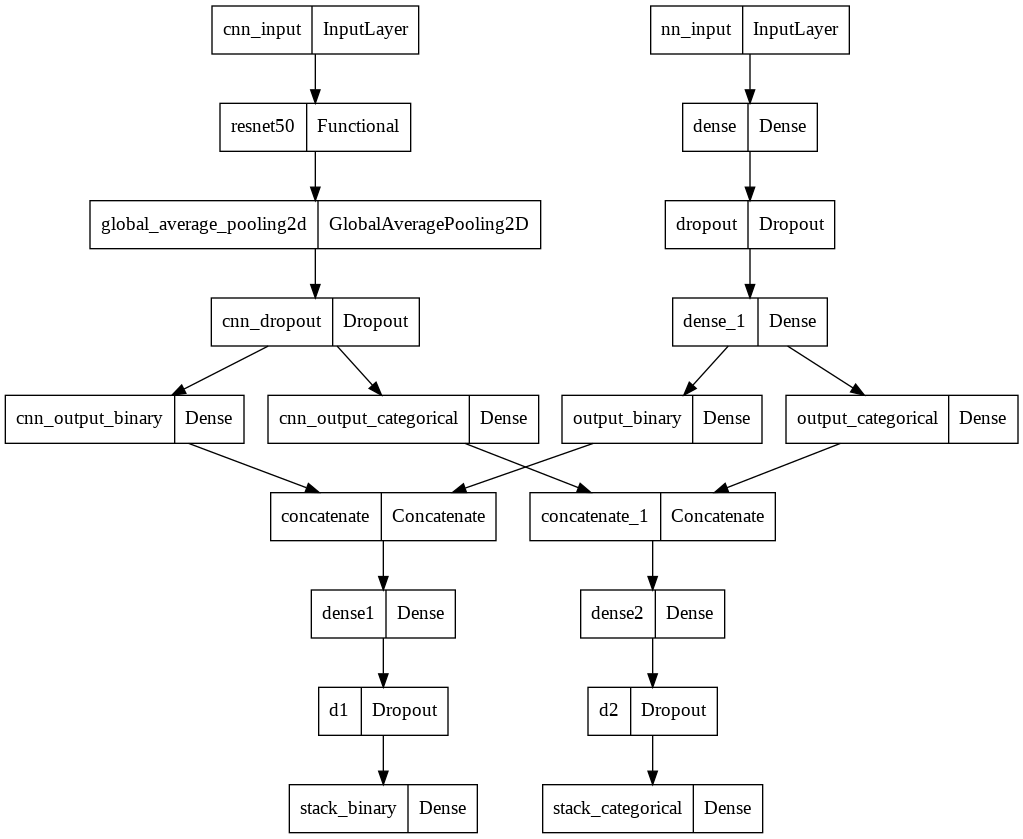

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(stack_model, to_file='stack_model.png')

In [ ]:
# Train the stack model

# class weights:  Keras bug currently prevents specifying weights for multi-output models
#  https://github.com/keras-team/keras/issues/11735
#weights={"stack_binary": binary_weights, "stack_categorical": { i:1. for i in range(NUM_CLASSES) }}

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
callbacks=[stop_early,learning_rate_reduction]
epochs = 100
stack_history = stack_model.fit( x=[stack_train_x1,stack_train_x2], y=[stack_train_y_binary, stack_train_y_categorical],
                        epochs=epochs, validation_split=0.2, callbacks=callbacks, sample_weight=stack_train_weights
                         )

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


49/49 [==============================] - 22s 348ms/step - loss: 6.8956 - stack_binary_loss: 1.7609 - stack_categorical_loss: 5.1347 - stack_binary_accuracy: 0.4424 - stack_categorical_accuracy: 0.1767 - val_loss: 6.9058 - val_stack_binary_loss: 1.7251 - val_stack_categorical_loss: 5.1807 - val_stack_binary_accuracy: 0.4859 - val_stack_categorical_accuracy: 0.3555 - lr: 3.0000e-04
Epoch 2/100
49/49 [==============================] - 13s 274ms/step - loss: 6.3170 - stack_binary_loss: 1.5866 - stack_categorical_loss: 4.7304 - stack_binary_accuracy: 0.4616 - stack_categorical_accuracy: 0.3348 - val_loss: 6.3275 - val_stack_binary_loss: 1.5248 - val_stack_categorical_loss: 4.8027 - val_stack_binary_accuracy: 0.4859 - val_stack_categorical_accuracy: 0.3708 - lr: 3.0000e-04
Epoch 3/100
49/49 [==============================] - 13s 274ms/step - loss: 5.7971 - stack_binary_loss: 1.4232 - stack_categorical_loss: 4.3740 - stack_binary_accuracy: 0.4706 - stack_categorical_accuracy: 0.4309 - val_los

In [ ]:
# fine tune entire model
if False:
  cnn_model.trainable=True
  meta_model.trainable=True

  #opt=tensorflow.keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
  opt=tensorflow.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
  stack_model.compile(optimizer=opt, loss=losses, metrics=['accuracy'] )
  print(stack_model.summary())

  epochs=100
  stack_history = stack_model.fit( x=[stack_train_x1,stack_train_x2], y=[stack_train_y_binary, stack_train_y_categorical],
                          epochs=epochs, validation_split=0.2, callbacks=callbacks, sample_weight=stack_train_weights
                          )

## Evaluation

dict_keys(['loss', 'stack_binary_loss', 'stack_categorical_loss', 'stack_binary_accuracy', 'stack_categorical_accuracy', 'val_loss', 'val_stack_binary_loss', 'val_stack_categorical_loss', 'val_stack_binary_accuracy', 'val_stack_categorical_accuracy', 'lr'])


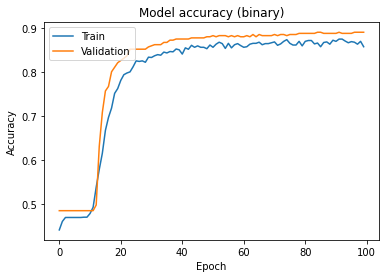

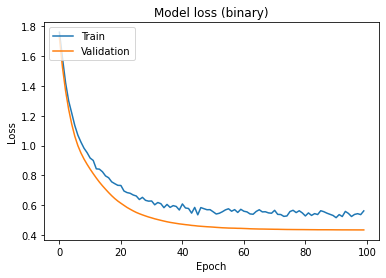

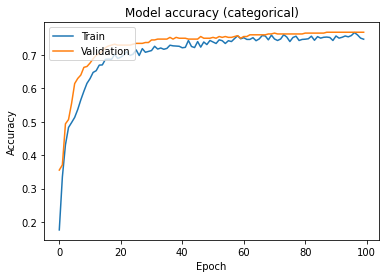

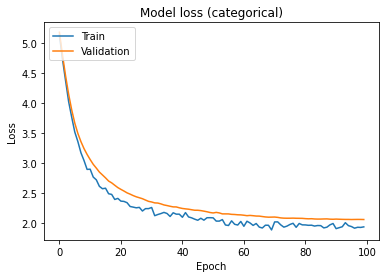

In [ ]:
def plot_train_and_val( history ):

  plt.plot(history.history['stack_binary_accuracy'])
  plt.plot(history.history['val_stack_binary_accuracy'])
  plt.title('Model accuracy (binary)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['stack_binary_loss'])
  plt.plot(history.history['val_stack_binary_loss'])
  plt.title('Model loss (binary)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['stack_categorical_accuracy'])
  plt.plot(history.history['val_stack_categorical_accuracy'])
  plt.title('Model accuracy (categorical)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['stack_categorical_loss'])
  plt.plot(history.history['val_stack_categorical_loss'])
  plt.title('Model loss (categorical)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

# evaluate
print(stack_history.history.keys())
plot_train_and_val( stack_history )

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  fig = plt.figure()
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      #print("Normalized confusion matrix")
  else:
      #print('Confusion matrix, without normalization')
      pass

  # print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close(fig)

from sklearn.metrics import roc_auc_score, accuracy_score


In [ ]:
scores = stack_model.evaluate( [stack_test_x1,stack_test_x2], [stack_test_y_binary, stack_test_y_categorical], return_dict=True )

# get y_true, y_hat
y_pred_binary, y_pred_categorical = stack_model.predict( [stack_test_x1,stack_test_x2] )

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid

# get true values from stack test datagen
y_true_binary = stack_test_datagen.classes  # this is already in binary mode
#y_true_categorical = keras.utils.to_categorical( get_df_for_files( stack_test_datagen.filenames ).diagnostic_categorical, NUM_CLASSES )  # categorical data 
y_true_categorical = get_df_for_files( stack_test_datagen.filenames ).diagnostic_categorical  # categorical data 
y_pred_categorical = np.argmax( y_pred_categorical, axis=1 )



/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


11/11 [==============================] - 5s 331ms/step - loss: 1.3589 - stack_binary_loss: 0.4794 - stack_categorical_loss: 0.8795 - stack_binary_accuracy: 0.8319 - stack_categorical_accuracy: 0.7246


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(345, 224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


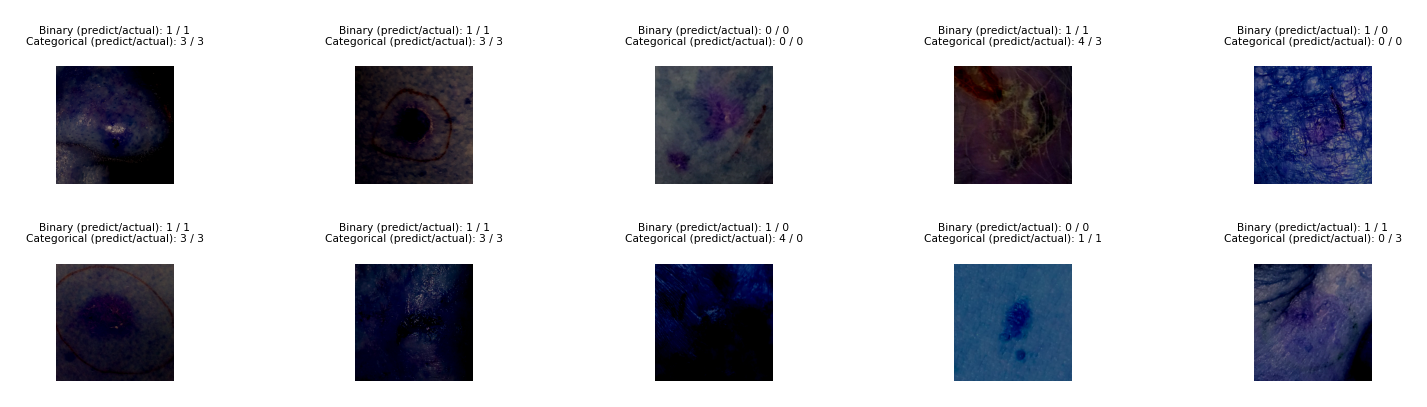

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

def plot_random_examples():

  plt.figure( dpi=256 )

  for i in range(10):
    r = random.randint( 0, stack_test_x1.shape[0]-1 )
    plt.subplot(5,5,i+1)
    fig=plt.imshow( (stack_test_x1[r,:,:,:])/255.)
    plt.axis('off')
    plt.title("Binary (predict/actual): {} / {}\nCategorical (predict/actual): {} / {}".format( 
        y_pred_binary[r][0], y_true_binary[r], y_pred_categorical[r], y_true_categorical[r]
        ),
        fontsize=3
        )
    plt.tight_layout()

print(stack_test_x1.shape)
plot_random_examples( )

### Binary classifier evaluation

In [ ]:
import sklearn
print('Test binary loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'stack_binary_loss' ], scores['stack_binary_accuracy'] ) )
print("ROC AUC binary: {}".format( sklearn.metrics.roc_auc_score(y_true_binary, y_pred_binary) ) )

Test binary loss / accuracy: 0.4794 / 0.8319 
ROC AUC binary: 0.8369155100390783


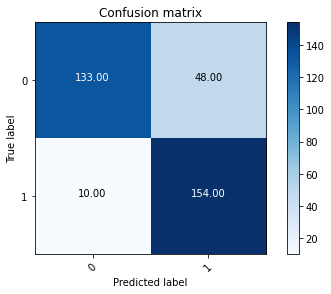

In [ ]:
# confusion matrix
cm = sklearn.metrics.confusion_matrix( y_true_binary, y_pred_binary )
plot_confusion_matrix( cm, classes=list(stack_test_datagen.class_indices.keys()))

In [ ]:
# Sensitivity, Specificity, Precision, F1
# Sensitivity = TP / ( TP+FN )
# Specificity = TN / ( TN+FP )
# Precision (PPV) = TP / ( TP+FP )

# get confusion matrix
tn, fp, fn, tp = confusion_matrix( y_true_binary, y_pred_binary ).ravel()
result={}
#result["accuracy"] = accuracy_score( y_true_binary, y_pred_binary )
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( y_true_binary, y_pred_binary, average="weighted" )

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print(classification_report( y_true_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))


              precision    recall  f1-score   support

           0       0.93      0.73      0.82       181
           1       0.76      0.94      0.84       164

    accuracy                           0.83       345
   macro avg       0.85      0.84      0.83       345
weighted avg       0.85      0.83      0.83       345

PPV: 0.76
Sensitivity: 0.94
Specificity: 0.73


### Categorical classifier evaluation

In [ ]:
print('Test categorical loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'stack_categorical_loss' ], scores['stack_categorical_accuracy'] ) )
#print("ROC AUC categorical (One vs Rest): {}".format( sklearn.metrics.roc_auc_score( y_true_categorical, y_pred_categorical, multi_class="ovr") ) )

Test categorical loss / accuracy: 0.8795 / 0.7246 


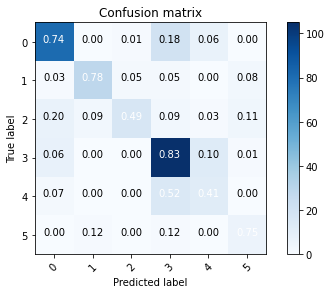

In [ ]:
cm = confusion_matrix( y_true_categorical, y_pred_categorical )
plot_confusion_matrix( cm, classes=[str(x) for x in range(NUM_CLASSES)], normalize=True )

In [ ]:
print(classification_report( y_true_categorical, y_pred_categorical ) )

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       109
           1       0.88      0.78      0.83        37
           2       0.85      0.49      0.62        35
           3       0.72      0.83      0.77       127
           4       0.36      0.41      0.39        29
           5       0.43      0.75      0.55         8

    accuracy                           0.72       345
   macro avg       0.68      0.67      0.65       345
weighted avg       0.74      0.72      0.73       345



## XAI/LIME using CNN model

Pick N random examples from the test data.  Perform a prediction, then show an image explaining why that prediction was made.

Binary prediction: CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


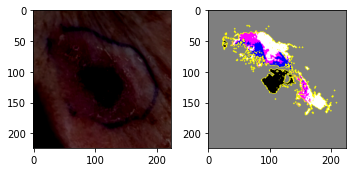

Binary prediction: NOT CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

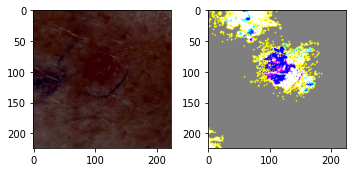

Binary prediction: NOT CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

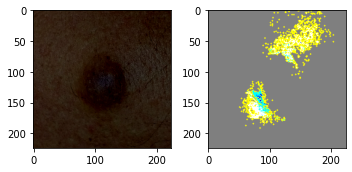

Binary prediction: CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

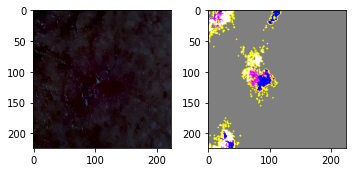

Binary prediction: CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

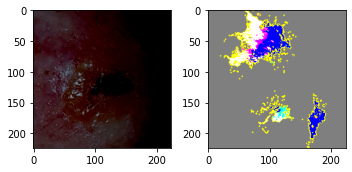

Binary prediction: CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

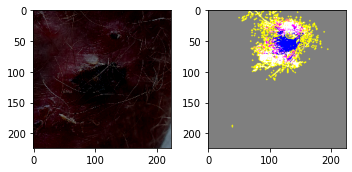

Binary prediction: CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

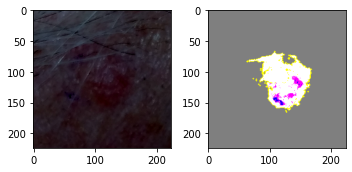

Binary prediction: CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

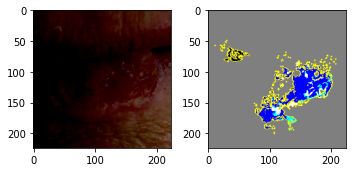

Binary prediction: CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

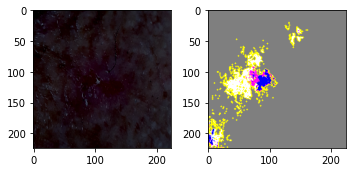

Binary prediction: NOT CANCEROUS


  0%|          | 0/100 [00:00<?, ?it/s]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

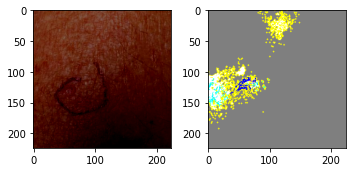

<Figure size 432x288 with 0 Axes>

In [ ]:
import random
from lime.lime_image import LimeImageExplainer
from skimage.segmentation import mark_boundaries
from matplotlib import pyplot as plt

def explain_image( model, img_data ):
  "use a keras model to predict/explain img data. img_data should be 4d input"

  explainer = LimeImageExplainer()
  predict_one_output = lambda x : model.predict( x )[0] # return the first output from the model

  pred = predict_one_output( img_data )[0][0]  # keras wants 4d img as input
  print( "Binary prediction: {}".format( "NOT CANCEROUS" if pred < 0.5 else "CANCEROUS" ) )

  explanation = explainer.explain_instance( 
      img_data[0].astype(np.double), 
      predict_one_output, 
      top_labels=2,
      num_samples=100,
      random_seed=42
      )

  temp, mask = explanation.get_image_and_mask( 0, positive_only=True, hide_rest=True )

  img_rgb = (img_data[0][:,:,[2,1,0]]/255.) # convert from bgr to rgb, then brighten
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
  axes[0].imshow( img_rgb )
  axes[1].imshow( mark_boundaries(temp / 2 + 0.5, mask) )
  fig.tight_layout()
  plt.show()
  plt.clf()
  print('='*100)

# Predict and explain N=10 random images from the test set
for _ in range( 10 ):
  idx = random.choice( range( stack_test_x1.shape[0] ) )
  explain_image( cnn_model, stack_test_x1[idx:idx+1,:,:,:] )


## TF-Lite export

In [ ]:
converter = tensorflow.lite.TFLiteConverter.from_keras_model(stack_model)
tflite_model = converter.convert()
tflite_path = "stack_model.tflite"
open(tflite_path, "wb").write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpz2weckam/assets


94061420

In [ ]:
# print details of tf-lite model
tflite_interpreter = tensorflow.lite.Interpreter(model_path=tflite_path)

input_details = tflite_interpreter.get_input_details()
output_details = tflite_interpreter.get_output_details()

print("== Input details ==")
for input in input_details:
  print("name:", input['name'])
  print("shape:", input['shape'])
  print("type:", input['dtype'])
  print('-'*10)

print("\n== Output details ==")
for output in output_details:
  print("name:", output['name'])
  print("shape:", output['shape'])
  print("type:", output['dtype'])
  print('-'*10)

== Input details ==
name: serving_default_nn_input:0
shape: [ 1 18]
type: <class 'numpy.float32'>
----------
name: serving_default_cnn_input:0
shape: [  1 224 224   3]
type: <class 'numpy.float32'>
----------

== Output details ==
name: StatefulPartitionedCall:1
shape: [1 6]
type: <class 'numpy.float32'>
----------
name: StatefulPartitionedCall:0
shape: [1 1]
type: <class 'numpy.float32'>
----------


In [ ]:
# Test the model on some input data
cnn_input_data = np.zeros( input_details[0]['shape'], dtype=np.float32)
nn_input_data = np.zeros( input_details[1]['shape'], dtype=np.float32)

print(cnn_input_data.shape)
print(nn_input_data.shape)

(1, 18)
(1, 224, 224, 3)


(1, 18)
Reading image file: /content/data/images/PAT_1790_3425_942.png
[100 115 171]
[171 115 100]


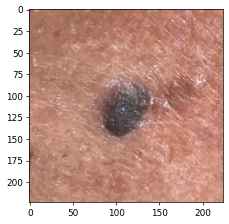

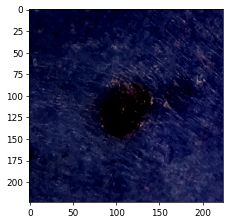

In [ ]:
infer_row = df_train.head(1)
infer_meta = infer_row.drop( columns=columns_to_drop, errors='ignore' )
print( infer_meta.shape )

# load the image
infer_img_path = data_directory + infer_row.img_id.values[0]

print("Reading image file: {}".format( infer_img_path ) )
infer_img = cv2.imread( infer_img_path )
print(infer_img[0][0])
infer_img = cv2.resize( infer_img, (image_shape[:2]) )
infer_img_rgb = cv2.cvtColor( infer_img, cv2.COLOR_BGR2RGB )

print(infer_img_rgb[0][0])

# show bgr
#plt.figure( dpi=64 )
#plt.subplot()
#fig=plt.imshow( (infer_img)/255.)



# show rgb, make sure it looks right
plt.figure( dpi=64 )
plt.subplot()
fig=plt.imshow( (infer_img_rgb)/255.)

# preprocess the image
infer_img = image_preprocessing_function( infer_img_rgb )
plt.figure( dpi=64 )
plt.subplot()
fig=plt.imshow( infer_img/255. )



In [ ]:
# convert to tf-lite shapes/types
infer_img_tf = infer_img.reshape( (1, *image_shape) )  # convert to (1,...)
infer_meta_tf = np.array( infer_meta, dtype=np.float32 )

# do it
tflite_interpreter.allocate_tensors()
tflite_interpreter.set_tensor(input_details[0]['index'], infer_img_tf)
tflite_interpreter.set_tensor(input_details[1]['index'], infer_meta_tf)
tflite_interpreter.invoke()

print("Predicted (binary/categorical):")
output_0 = tflite_interpreter.get_tensor(output_details[0]['index'])
print(output_0)
output_1 = tflite_interpreter.get_tensor(output_details[1]['index'])
print(output_1)

print("\nGround truth:")
print("Binary: {}".format( infer_row.diagnostic_binary.values[0] ) )
print("Categorical: {}".format( infer_row.diagnostic_categorical.values[0] ) )

In [ ]:
# debugging stuff
print(infer_meta_tf)

[[ 0.          0.          0.41124412  0.          0.          1.
   1.          1.         -0.28738758  5.         -0.17573152 -0.11812692
   1.          0.          0.          0.          0.          1.        ]]


In [ ]:
print(infer_img_rgb[0][0])
print(infer_img[0][0])

[171 115 100]
[-3.939003  -1.7789993 47.32     ]


In [ ]:
print(infer_img_tf)

[[[[-3.9390030e+00 -1.7789993e+00  4.7320000e+01]
   [ 9.0609970e+00  1.0221001e+01  5.7320000e+01]
   [ 1.8060997e+01  2.1221001e+01  6.7320000e+01]
   ...
   [ 6.0997009e-02  2.2210007e+00  6.0320000e+01]
   [ 6.0609970e+00  1.0221001e+01  6.7320000e+01]
   [ 1.0609970e+00  4.2210007e+00  6.2320000e+01]]

  [[-2.0939003e+01 -1.8778999e+01  2.9320000e+01]
   [-1.2939003e+01 -1.0778999e+01  3.5320000e+01]
   [-9.3900299e-01 -7.7899933e-01  4.7320000e+01]
   ...
   [ 4.0609970e+00  7.2210007e+00  6.4320000e+01]
   [ 1.6060997e+01  1.8221001e+01  7.7320000e+01]
   [ 1.4060997e+01  1.5221001e+01  7.3320000e+01]]

  [[-2.3939003e+01 -1.6778999e+01  2.9320000e+01]
   [-1.6939003e+01 -1.3778999e+01  3.5320000e+01]
   [-1.2939003e+01 -1.0778999e+01  3.7320000e+01]
   ...
   [ 4.0060997e+01  4.4221001e+01  1.0132000e+02]
   [ 2.7060997e+01  3.0221001e+01  8.8320000e+01]
   [ 6.0997009e-02  2.2210007e+00  6.1320000e+01]]

  ...

  [[ 1.9060997e+01  2.3221001e+01  6.5320000e+01]
   [ 3.2060997e+

In [ ]:
def mypiePlot(df,xVar,yVar,t):
    '''
    function to plot pie charts 
    inputs: 
        df --> DataFrame
        xVar --> coloumn to be plotted
        yVar --> plotting values according to this value

        t --> tittle of figure
        
    outputs: pie chart plot
    '''
    df.goupby([xVar])
    #group by coloumn, and then select top 10 values to show
    if yVar == 'Count':
        df.groupby([xVar]).size().sort_values(ascending=False)[:10].plot.pie(figsize=(10,10),autopct="%.2f")
    elif yVar == 'Revenue':
        df.groupby([xVar]).revenue_adj.sum().sort_values(ascending=False)[:10].plot.pie(figsize=(10,10),autopct="%.2f")
    
    #tittle for the chart
    plt.title(t.title(),fontsize=10,weight='bold')

# Our Work

## Correlation

In [ ]:
corr_matrix = df.corr()
corr_matrix['diagnostic_binary'].sort_values(ascending=False)

diagnostic_binary              1.000000
diagnostic_categorical         0.889930
biopsed                        0.801039
bleed                          0.443211
gender                         0.398725
elevation                      0.372472
skin_cancer_history            0.357427
hurt                           0.357019
pesticide                      0.342005
drink                          0.248592
smoke                          0.234763
age                            0.210915
itch                           0.200388
grew                           0.185978
changed                        0.148582
diameter_1                     0.134621
diameter_2                     0.133198
fitspatrick                    0.053447
region                         0.042707
has_piped_water               -0.307375
has_sewage_system             -0.344601
cancer_history                -0.346693
background_mother_converted   -0.367557
background_father_converted   -0.367557
lesion_id                     -0.438350


In [ ]:
corr_matrix = df.corr()
corr_matrix['diagnostic_categorical'].sort_values(ascending=False)

diagnostic_categorical         1.000000
diagnostic_binary              0.889930
biopsed                        0.678000
elevation                      0.415263
gender                         0.329147
bleed                          0.314589
skin_cancer_history            0.289827
pesticide                      0.269048
hurt                           0.260242
grew                           0.246204
drink                          0.215396
smoke                          0.203336
changed                        0.191077
age                            0.174257
diameter_2                     0.127105
diameter_1                     0.126517
fitspatrick                    0.056834
itch                           0.004094
region                        -0.011903
has_piped_water               -0.253876
cancer_history                -0.279450
has_sewage_system             -0.284755
background_mother_converted   -0.299646
background_father_converted   -0.299646
lesion_id                     -0.354563


In [ ]:
df.head()

,patient_id,lesion_id,smoke,drink,age,pesticide,gender,skin_cancer_history,cancer_history,has_piped_water,has_sewage_system,fitspatrick,region,diameter_1,diameter_2,diagnostic,itch,grew,hurt,changed,bleed,elevation,img_id,biopsed,diagnostic_binary,diagnostic_categorical,background_father_converted,background_mother_converted
0,PAT_1516,0.196539,0,0,-3.301454,0,0,0,1,1,1,-0.287388,1,-0.175732,-0.118127,NEV,0,0,0,0,0,0,PAT_1516_1765_530.png,0,0,1,11,11
1,PAT_46,-0.542575,0,0,-0.343881,0,0,1,1,1,1,1.376130,10,-0.745672,-0.757749,BCC,1,1,0,1,1,1,PAT_46_881_939.png,1,1,3,11,11
2,PAT_1545,0.281822,0,0,1.040515,0,0,0,1,1,1,-0.287388,5,-0.175732,-0.118127,ACK,1,0,0,0,0,0,PAT_1545_1867_547.png,0,0,0,11,11
3,PAT_1989,2.116231,0,0,0.914661,0,0,0,1,1,1,-0.287388,8,-0.175732,-0.118127,ACK,1,0,0,0,0,0,PAT_1989_4061_934.png,0,0,0,11,11
4,PAT_684,-0.190576,0,1,1.166369,0,1,1,0,0,0,-1.950906,7,-0.888157,-0.757749,BCC,1,1,0,0,1,1,PAT_684_1302_588.png,1,1,3,11,11


## Meta classifier

In [ ]:
# support function for training and evaluating a scikit learn model
def evalSklModel( m, x_train_, y_train_, x_test_, y_test_ ):
  m.fit( x_train_, y_train_ )

  # Predict on validation set
  pred = m.predict( x_test_ )
  pred_prob = m.predict_proba( x_test_ )
 
  # print accuracy
  print( "Accuracy: %.4f" % accuracy_score( y_test_, pred ) )

  confusion_mtx = confusion_matrix( y_test_, pred )
  np.set_printoptions(precision=2)
  plot_confusion_matrix( confusion_mtx, ["0", "1","2","3","4","5"], normalize=True)

  print(classification_report( y_test_, pred))

### All Feautre list

#### Paper Model

In [ ]:
from keras.models import Model
from keras import layers

def get_nn_model( input_shape ):
  input = layers.Input( shape=input_shape, name='nn_input' )

  # with sample_weights
  #x = layers.Dense( 512, activation='relu' )( input )
  #x = layers.Dropout( 0.7 )( x )
  #x = layers.Dense( 512, activation='relu' )( x )
  #x = layers.Dropout( 0.7 )( x )
  
  # without sample weights
  x = layers.Dense( 64, activation='relu' )( input )
  x = layers.Dropout( 0.15 )( x )
  x = layers.Dense( 64, activation='relu' )( x )

  output_binary = layers.Dense(1, activation='sigmoid', name='output_binary' )( x )
  output_cat = layers.Dense( NUM_CLASSES, activation='softmax', name='output_categorical' )( x )
  return Model(inputs=[input], outputs=[output_binary, output_cat], name='meta_model')

In [ ]:
import matplotlib.pyplot as plt

def plot_train_and_val( history ):

  plt.plot(history.history['output_binary_accuracy'])
  plt.plot(history.history['val_output_binary_accuracy'])
  plt.title('Model accuracy (binary)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['output_binary_loss'])
  plt.plot(history.history['val_output_binary_loss'])
  plt.title('Model loss (binary)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['output_categorical_accuracy'])
  plt.plot(history.history['val_output_categorical_accuracy'])
  plt.title('Model accuracy (categorical)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['output_categorical_loss'])
  plt.plot(history.history['val_output_categorical_loss'])
  plt.title('Model loss (categorical)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [ ]:
# remove labels, non-informative columns, and clinical data from df_train/test
#   background_* columns are regionally-specific to dataset

columns_to_drop = ['patient_id','img_id','diagnostic','diagnostic_binary','diagnostic_categorical']                   
X_meta_train = df_train.drop( columns=columns_to_drop, errors='ignore' )
X_meta_test = df_test.drop( columns=columns_to_drop, errors='ignore' )
print("Meta train:")
describe_dataframe( X_meta_train, 25 )

Meta train:
COLUMNS:
0: lesion_id, type=float64
1: smoke, type=int32
2: drink, type=int32
3: age, type=float64
4: pesticide, type=int32
5: gender, type=int32
6: skin_cancer_history, type=int32
7: cancer_history, type=int32
8: has_piped_water, type=int32
9: has_sewage_system, type=int32
10: fitspatrick, type=float64
11: region, type=int64
12: diameter_1, type=float64
13: diameter_2, type=float64
14: itch, type=int32
15: grew, type=int32
16: hurt, type=int32
17: changed, type=int32
18: bleed, type=int32
19: elevation, type=int32
20: biopsed, type=int32
21: background_father_converted, type=int64
22: background_mother_converted, type=int64
      lesion_id  smoke  drink       age  pesticide  gender  skin_cancer_history  cancer_history  has_piped_water  has_sewage_system  fitspatrick  region  diameter_1  diameter_2  itch  grew  hurt  changed  bleed  elevation  biopsed  background_father_converted  background_mother_converted
23     1.584470      0      0  0.411244          0       0        

Model: "meta_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 nn_input (InputLayer)          [(None, 23)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           1536        ['nn_input[0][0]']               
                                                                                                  
 dropout (Dropout)              (None, 64)           0           ['dense[0][0]']                  
                                                                                                  
 dense_1 (Dense)                (None, 64)           4160        ['dropout[0][0]']                
                                                                                         

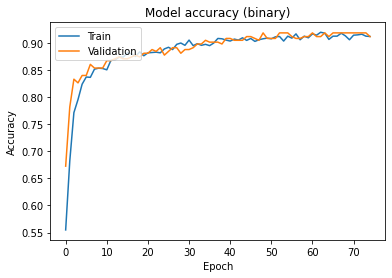

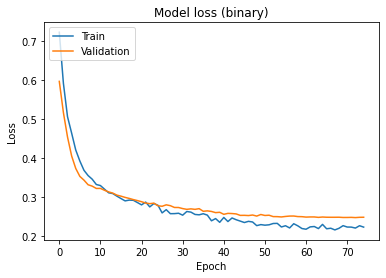

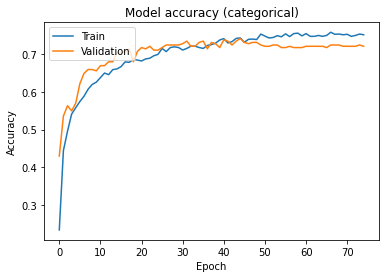

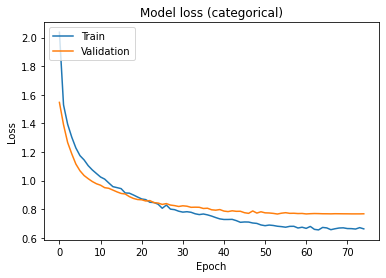

In [ ]:
import tensorflow

meta_model = get_nn_model( X_meta_train.shape[1:] )
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.00025 )
losses = { "output_binary": tensorflow.keras.losses.BinaryCrossentropy(), 
          "output_categorical": tensorflow.keras.losses.CategoricalCrossentropy() }
meta_model.compile(optimizer=opt, loss=losses, metrics=['accuracy'] )
print(meta_model.summary())

epochs = 75

stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)
callbacks=[learning_rate_reduction]

meta_history = meta_model.fit( x= np.array( X_meta_train ), y=[np.array( y_train_binary ), np.array( y_train_categorical )], 
               epochs=epochs, callbacks=callbacks, validation_split=0.15 , verbose=1 #, sample_weight=X_train_sample_weights 
               )

plot_train_and_val( meta_history )

##### Binary

In [ ]:
import sklearn

# eval weighting
#scores = meta_model.evaluate( X_meta_test, [y_test_binary, y_test_categorical], return_dict=True )

# get y_true, y_hat
y_pred_binary, y_pred_categorical = meta_model.predict( X_meta_test )
scores = meta_model.evaluate(X_meta_test)

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid
y_pred_categorical = np.argmax( y_pred_categorical, axis=1 )

# get confusion matrix
tn, fp, fn, tp = sklearn.metrics.confusion_matrix( y_test_binary, y_pred_binary ).ravel()
result={}
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( y_test_binary, y_pred_binary, average="weighted" )

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print( sklearn.metrics.classification_report( y_test_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))

11/11 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - output_binary_loss: 0.0000e+00 - output_categorical_loss: 0.0000e+00 - output_binary_accuracy: 0.0000e+00 - output_categorical_accuracy: 0.0000e+00
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       181
           1       0.82      0.91      0.86       164

    accuracy                           0.86       345
   macro avg       0.87      0.87      0.86       345
weighted avg       0.87      0.86      0.86       345

PPV: 0.82
Sensitivity: 0.91
Specificity: 0.82


##### Categorical

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  fig = plt.figure()
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      #print("Normalized confusion matrix")
  else:
      #print('Confusion matrix, without normalization')
      pass

  # print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close(fig)

from sklearn.metrics import roc_auc_score, accuracy_score

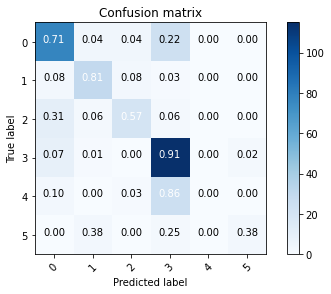

In [ ]:
cm = confusion_matrix( np.argmax(y_test_categorical,axis=1), y_pred_categorical )
plot_confusion_matrix( cm, classes=[str(x) for x in range(NUM_CLASSES)], normalize=True )

In [ ]:
print(classification_report( np.argmax(y_test_categorical,axis=1), y_pred_categorical ) )

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       109
           1       0.75      0.81      0.78        37
           2       0.71      0.57      0.63        35
           3       0.68      0.91      0.78       127
           4       0.00      0.00      0.00        29
           5       0.60      0.38      0.46         8

    accuracy                           0.71       345
   macro avg       0.58      0.56      0.56       345
weighted avg       0.65      0.71      0.67       345



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

print ("Random forest (binary):")
rfc_train_x, rfc_val_x, rfc_train_y, rfc_val_y = train_test_split( X_meta_train, y_train_binary, stratify=y_train_binary, random_state=42, test_size=0.2 )
rfc = RandomForestClassifier()
rfc.fit( rfc_train_x, rfc_train_y )
y_pred = rfc.predict( rfc_val_x )
print( "Accuracy: %.4f" % accuracy_score( rfc_val_y, y_pred ) )

print ("Random forest (categorical):")
rfc_train_x, rfc_val_x, rfc_train_y, rfc_val_y = train_test_split( X_meta_train, y_train_categorical, stratify=y_train_categorical, random_state=42, test_size=0.2 )
rfc = RandomForestClassifier()
rfc.fit( rfc_train_x, rfc_train_y )
y_pred = rfc.predict( rfc_val_x )
print( "Accuracy: %.4f" % accuracy_score( rfc_val_y, y_pred ) )


Random forest (binary):


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy: 0.9105
Random forest (categorical):
Accuracy: 0.7826


#### Binary Model

In [ ]:
from keras.models import Model
from keras import layers

def get_nn_model(input_shape,type):
  input = layers.Input( shape=input_shape, name='nn_input' )

  # with sample_weights
  x = layers.Dense( 512, activation='relu' )( input )
  x = layers.Dropout( 0.7 )( x )
  x = layers.Dense( 512, activation='relu' )( x )
  x = layers.Dropout( 0.7 )( x )
  
  # without sample weights
  x = layers.Dense( 64, activation='relu' )( input )
  x = layers.Dropout( 0.15 )( x )
  x = layers.Dense( 64, activation='relu' )( x )

  if type == 'binary':
    output_binary = layers.Dense(1, activation='sigmoid', name='output_binary' )( x )
    return Model(inputs=input, outputs=output_binary, name='meta_model_binary')
  else:
    output_cat = layers.Dense(NUM_CLASSES, activation='softmax', name='output_categorical' )( x )
    return Model(inputs=input, outputs=output_cat, name='meta_model_categorical')

In [ ]:
import matplotlib.pyplot as plt

def plot_train_and_val( history ):

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy (binary)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss (binary)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()


Model: "meta_model_binary"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 nn_input (InputLayer)       [(None, 23)]              0         
                                                                 
 dense_4 (Dense)             (None, 64)                1536      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 output_binary (Dense)       (None, 1)                 65        
                                                                 
Total params: 5,761
Trainable params: 5,761
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/75
52/52 [========================

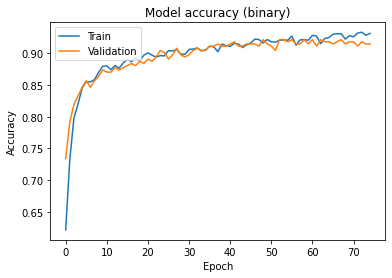

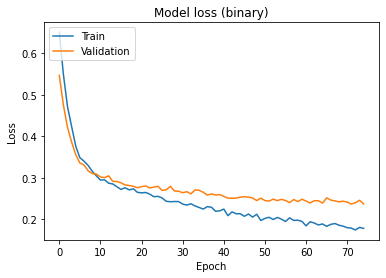

In [ ]:
meta_model = get_nn_model( X_meta_train.shape[1:],'binary')
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.00025 )
#losses = { "output_binary": tensorflow.keras.losses.BinaryCrossentropy}
meta_model.compile(optimizer=opt, loss= tensorflow.keras.losses.BinaryCrossentropy(), metrics=['accuracy'] )
print(meta_model.summary())

epochs = 75

stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
#learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001, cooldown=2)
#callbacks=[learning_rate_reduction]

#callbacks = callbacks
meta_history = meta_model.fit( x= np.array(X_meta_train), y=np.array( y_train_binary ), 
               epochs=epochs, validation_split=0.15 , verbose=1 #, sample_weight=X_train_sample_weights 
               )

plot_train_and_val( meta_history )

In [ ]:
import sklearn

# eval weighting
#scores = meta_model.evaluate( X_meta_test, [y_test_binary, y_test_categorical], return_dict=True )

# get y_true, y_hat
y_pred_binary = meta_model.predict( X_meta_test )

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid

# get confusion matrix
tn, fp, fn, tp = sklearn.metrics.confusion_matrix( y_test_binary, y_pred_binary ).ravel()
result={}
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( y_test_binary, y_pred_binary, average="weighted" )

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print( sklearn.metrics.classification_report( y_test_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       181
           1       0.83      0.91      0.87       164

    accuracy                           0.87       345
   macro avg       0.87      0.87      0.87       345
weighted avg       0.87      0.87      0.87       345

PPV: 0.83
Sensitivity: 0.91
Specificity: 0.83


#### Categorical Model

Model: "meta_model_categorical"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 nn_input (InputLayer)       [(None, 23)]              0         
                                                                 
 dense_8 (Dense)             (None, 64)                1536      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 output_categorical (Dense)  (None, 6)                 390       
                                                                 
Total params: 6,086
Trainable params: 6,086
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/75
52/52 [===================

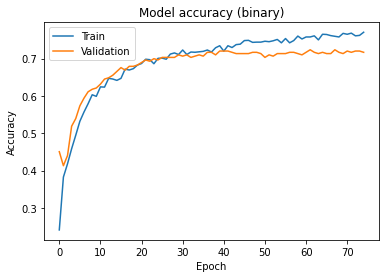

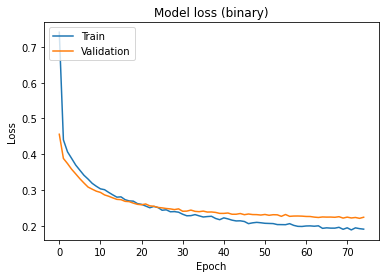

In [ ]:
meta_model = get_nn_model( X_meta_train.shape[1:],'categorical')
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.00025 )
#losses = { "output_binary": tensorflow.keras.losses.BinaryCrossentropy}
meta_model.compile(optimizer=opt, loss= tensorflow.keras.losses.BinaryCrossentropy(), metrics=['accuracy'] )
print(meta_model.summary())

epochs = 75

stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
#learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001, cooldown=2)
#callbacks=[learning_rate_reduction]

#callbacks = callbacks
meta_history = meta_model.fit( x= np.array(X_meta_train), y=np.array( y_train_categorical), 
               epochs=epochs, validation_split=0.15 , verbose=1 #, sample_weight=X_train_sample_weights 
               )

plot_train_and_val( meta_history )

In [ ]:
y_pred_categorical = meta_model.predict( X_meta_test )
y_pred_categorical = np.argmax( y_pred_categorical, axis=1 )

scores = meta_model.evaluate(X_meta_test)


11/11 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


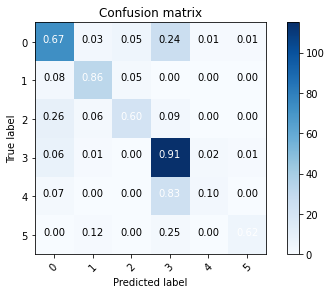

In [ ]:
cm = confusion_matrix( np.argmax(y_test_categorical,axis=1), y_pred_categorical )
plot_confusion_matrix( cm, classes=[str(x) for x in range(NUM_CLASSES)], normalize=True )

In [ ]:
print(classification_report(np.argmax( y_test_categorical, axis=1 ) , y_pred_categorical ) )

              precision    recall  f1-score   support

           0       0.77      0.67      0.72       109
           1       0.82      0.86      0.84        37
           2       0.75      0.60      0.67        35
           3       0.68      0.91      0.77       127
           4       0.50      0.10      0.17        29
           5       0.71      0.62      0.67         8

    accuracy                           0.72       345
   macro avg       0.70      0.63      0.64       345
weighted avg       0.71      0.72      0.70       345



### Highly Correlated feautres

In [ ]:
# +- 30% Threshold

columns1_to_drop = ['patient_id','img_id','diagnostic','diagnostic_binary','diagnostic_categorical'
                    ,'drink','smoke','age','itch','grew','changed','diameter_1','diameter_2',
                    'fitspatrick','region']

columns2_to_drop = ['patient_id','img_id','diagnostic','diagnostic_binary','diagnostic_categorical', 
                   'skin_cancer_history', 'pesticide', 'hurt','grew','drink','smoke','changed','age',
                   'diameter_2', 'diameter_1','fitspatrick','itch','region','has_piped_water','cancer_history',
                   'has_sewage_system','background_mother_converted','background_father_converted']

X_meta_binary_train = df_train.drop( columns=columns1_to_drop, errors='ignore' )
X_meta_binary_test = df_test.drop( columns=columns1_to_drop, errors='ignore' )

X_meta_categorical_train = df_train.drop( columns=columns2_to_drop, errors='ignore' )
X_meta_categorical_test = df_test.drop( columns=columns2_to_drop, errors='ignore' )

In [ ]:
# +- 20% Threshold
columns1_to_drop = ['patient_id','img_id','diagnostic','diagnostic_binary','diagnostic_categorical'
                    ,'grew','changed','diameter_1','diameter_2','fitspatrick','region']

columns2_to_drop = ['patient_id','img_id','diagnostic','diagnostic_binary','diagnostic_categorical' 
                    ,'changed','age','diameter_2', 'diameter_1','fitspatrick','itch','region']
                   
X_meta_binary_train = df_train.drop( columns=columns1_to_drop, errors='ignore' )
X_meta_binary_test = df_test.drop( columns=columns1_to_drop, errors='ignore' )

X_meta_categorical_train = df_train.drop( columns=columns2_to_drop, errors='ignore' )
X_meta_categorical_test = df_test.drop( columns=columns2_to_drop, errors='ignore' )

#### paper Model

In [ ]:
# +- 20% Threshold
columns_to_drop = ['patient_id','img_id','diagnostic','diagnostic_binary','diagnostic_categorical' 
                    ,'changed','diameter_2', 'diameter_1','fitspatrick','region']

X_meta_train = df_train.drop( columns=columns_to_drop, errors='ignore' )
X_meta_test = df_test.drop( columns=columns_to_drop, errors='ignore' )

In [ ]:
import matplotlib.pyplot as plt

def plot_train_and_val( history ):

  plt.plot(history.history['output_binary_accuracy'])
  plt.plot(history.history['val_output_binary_accuracy'])
  plt.title('Model accuracy (binary)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['output_binary_loss'])
  plt.plot(history.history['val_output_binary_loss'])
  plt.title('Model loss (binary)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['output_categorical_accuracy'])
  plt.plot(history.history['val_output_categorical_accuracy'])
  plt.title('Model accuracy (categorical)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['output_categorical_loss'])
  plt.plot(history.history['val_output_categorical_loss'])
  plt.title('Model loss (categorical)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

Model: "meta_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 nn_input (InputLayer)          [(None, 18)]         0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 64)           1216        ['nn_input[0][0]']               
                                                                                                  
 dropout_1 (Dropout)            (None, 64)           0           ['dense_2[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 64)           4160        ['dropout_1[0][0]']              
                                                                                         

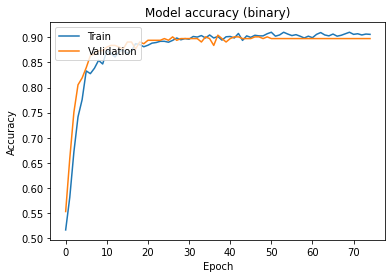

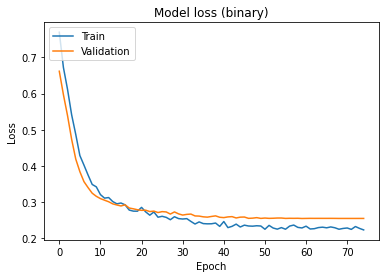

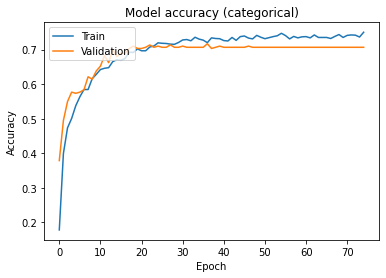

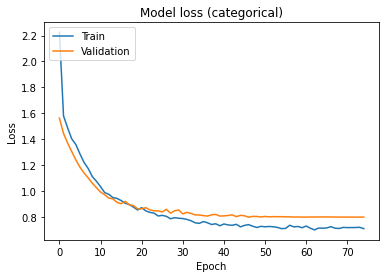

In [ ]:
from keras.models import Model
from keras import layers
import tensorflow
def get_nn_model( input_shape ):
  input = layers.Input( shape=input_shape, name='nn_input' )

  # with sample_weights
  #x = layers.Dense( 512, activation='relu' )( input )
  #x = layers.Dropout( 0.7 )( x )
  #x = layers.Dense( 512, activation='relu' )( x )
  #x = layers.Dropout( 0.7 )( x )
  
  # without sample weights
  x = layers.Dense( 64, activation='relu' )( input )
  x = layers.Dropout( 0.15 )( x )
  x = layers.Dense( 64, activation='relu' )( x )

  output_binary = layers.Dense(1, activation='sigmoid', name='output_binary' )( x )
  output_cat = layers.Dense( NUM_CLASSES, activation='softmax', name='output_categorical' )( x )
  return Model(inputs=[input], outputs=[output_binary, output_cat], name='meta_model')

meta_model = get_nn_model( X_meta_train.shape[1:] )
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.00025 )
losses = { "output_binary": tensorflow.keras.losses.BinaryCrossentropy(), 
          "output_categorical": tensorflow.keras.losses.CategoricalCrossentropy() }
meta_model.compile(optimizer=opt, loss=losses, metrics=['accuracy'] )
print(meta_model.summary())

epochs = 75

stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, 
                                            min_lr=0.000001, cooldown=2)
callbacks=[learning_rate_reduction]

meta_history = meta_model.fit( x= np.array( X_meta_train ), y=[np.array( y_train_binary ), np.array( y_train_categorical )], 
               epochs=epochs, callbacks=callbacks, validation_split=0.15 , verbose=1 #, sample_weight=X_train_sample_weights 
               )

plot_train_and_val( meta_history )

In [ ]:
import sklearn

# eval weighting
#scores = meta_model.evaluate( X_meta_test, [y_test_binary, y_test_categorical], return_dict=True )

# get y_true, y_hat
y_pred_binary, y_pred_categorical = meta_model.predict( X_meta_test )

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid
y_pred_categorical = np.argmax( y_pred_categorical, axis=1 )

# get confusion matrix
tn, fp, fn, tp = sklearn.metrics.confusion_matrix( y_test_binary, y_pred_binary ).ravel()
result={}
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( y_test_binary, y_pred_binary, average="weighted" )

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print( sklearn.metrics.classification_report( y_test_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       181
           1       0.82      0.91      0.86       164

    accuracy                           0.86       345
   macro avg       0.86      0.86      0.86       345
weighted avg       0.87      0.86      0.86       345

PPV: 0.82
Sensitivity: 0.91
Specificity: 0.82


In [ ]:
# support function for training and evaluating a scikit learn model
def evalSklModel( m, x_train_, y_train_, x_test_, y_test_ ):
  m.fit( x_train_, y_train_ )

  # Predict on validation set
  pred = m.predict( x_test_ )
  pred_prob = m.predict_proba( x_test_ )
 
  # print accuracy
  print( "Accuracy: %.4f" % accuracy_score( y_test_, pred ) )

  confusion_mtx = confusion_matrix( y_test_, pred )
  np.set_printoptions(precision=2)
  plot_confusion_matrix( confusion_mtx, ["0", "1","2","3","4","5"], normalize=True)

  print(classification_report( y_test_, pred))

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

print ("Random forest (binary):")
rfc_train_x, rfc_val_x, rfc_train_y, rfc_val_y = train_test_split( X_meta_train, y_train_binary, stratify=y_train_binary, random_state=42, test_size=0.2 )
rfc = RandomForestClassifier()
rfc.fit( rfc_train_x, rfc_train_y )
y_pred = rfc.predict( rfc_val_x )
print( "Accuracy: %.4f" % accuracy_score( rfc_val_y, y_pred ) )

print ("Random forest (categorical):")
rfc_train_x, rfc_val_x, rfc_train_y, rfc_val_y = train_test_split( X_meta_train, y_train_categorical, stratify=y_train_categorical, random_state=42, test_size=0.2 )
rfc = RandomForestClassifier()
rfc.fit( rfc_train_x, rfc_train_y )
y_pred = rfc.predict( rfc_val_x )
print( "Accuracy: %.4f" % accuracy_score( rfc_val_y, y_pred ) )


Random forest (binary):


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Accuracy: 0.9054
Random forest (categorical):
Accuracy: 0.7826


#### Binary

In [ ]:
from keras.models import Model
from keras import layers

def get_nn_model(input_shape,type):
  input = layers.Input( shape=input_shape, name='nn_input' )

  # with sample_weights
  x = layers.Dense( 512, activation='relu' )( input )
  x = layers.Dropout( 0.7 )( x )
  x = layers.Dense( 512, activation='relu' )( x )
  x = layers.Dropout( 0.7 )( x )
  
  # without sample weights
  x = layers.Dense( 64, activation='relu' )( input )
  x = layers.Dropout( 0.15 )( x )
  x = layers.Dense( 64, activation='relu' )( x )

  if type == 'binary':
    output_binary = layers.Dense(1, activation='sigmoid', name='output_binary' )( x )
    return Model(inputs=input, outputs=output_binary, name='meta_model_binary')
  else:
    output_cat = layers.Dense(NUM_CLASSES, activation='softmax', name='output_categorical' )( x )
    return Model(inputs=input, outputs=output_cat, name='meta_model_categorical')

In [ ]:
import matplotlib.pyplot as plt

def plot_train_and_val( history ):

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy (binary)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss (binary)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()


Model: "meta_model_binary"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 nn_input (InputLayer)       [(None, 17)]              0         
                                                                 
 dense_50 (Dense)            (None, 64)                1152      
                                                                 
 dropout_29 (Dropout)        (None, 64)                0         
                                                                 
 dense_51 (Dense)            (None, 64)                4160      
                                                                 
 output_binary (Dense)       (None, 1)                 65        
                                                                 
Total params: 5,377
Trainable params: 5,377
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/75
52/52 [========================

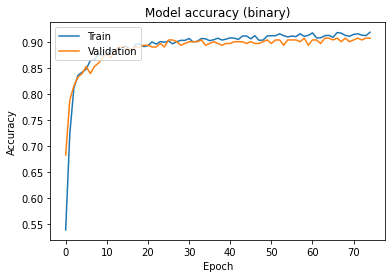

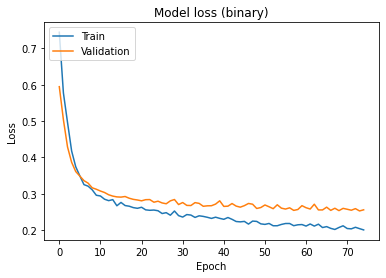

In [ ]:
meta_model = get_nn_model( X_meta_binary_train.shape[1:],'binary')
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.00025 )
#losses = { "output_binary": tensorflow.keras.losses.BinaryCrossentropy}
meta_model.compile(optimizer=opt, loss= tensorflow.keras.losses.BinaryCrossentropy(), metrics=['accuracy'] )
print(meta_model.summary())

epochs = 75

stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
#learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001, cooldown=2)
#callbacks=[learning_rate_reduction]

#callbacks = callbacks
meta_history = meta_model.fit( x= np.array(X_meta_binary_train), y=np.array( y_train_binary ), 
               epochs=epochs, validation_split=0.15 , verbose=1 #, sample_weight=X_train_sample_weights 
               )

plot_train_and_val( meta_history )

In [ ]:
import sklearn

# eval weighting
#scores = meta_model.evaluate( X_meta_test, [y_test_binary, y_test_categorical], return_dict=True )

# get y_true, y_hat
y_pred_binary = meta_model.predict( X_meta_binary_test )

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid

# get confusion matrix
tn, fp, fn, tp = sklearn.metrics.confusion_matrix( y_test_binary, y_pred_binary ).ravel()
result={}
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( y_test_binary, y_pred_binary, average="weighted" )

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print( sklearn.metrics.classification_report( y_test_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       181
           1       0.83      0.95      0.89       164

    accuracy                           0.88       345
   macro avg       0.89      0.89      0.88       345
weighted avg       0.89      0.88      0.88       345

PPV: 0.83
Sensitivity: 0.95
Specificity: 0.82


#### categorical

In [ ]:
from keras.models import Model
from keras import layers

def get_nn_model(input_shape,type):
  input = layers.Input( shape=input_shape, name='nn_input' )

  # with sample_weights
  x = layers.Dense( 512, activation='relu' )( input )
  x = layers.Dropout( 0.7 )( x )
  x = layers.Dense( 512, activation='relu' )( x )
  x = layers.Dropout( 0.7 )( x )
  
  # without sample weights
  x = layers.Dense( 64, activation='relu' )( input )
  x = layers.Dropout( 0.15 )( x )
  x = layers.Dense( 64, activation='relu' )( x )

  if type == 'binary':
    output_binary = layers.Dense(1, activation='sigmoid', name='output_binary' )( x )
    return Model(inputs=input, outputs=output_binary, name='meta_model_binary')
  else:
    output_cat = layers.Dense(NUM_CLASSES, activation='softmax', name='output_categorical' )( x )
    return Model(inputs=input, outputs=output_cat, name='meta_model_categorical')

In [ ]:
import matplotlib.pyplot as plt

def plot_train_and_val( history ):

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy (categorical)')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss (categorical)')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()


Model: "meta_model_categorical"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 nn_input (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_76 (Dense)            (None, 64)                1088      
                                                                 
 dropout_48 (Dropout)        (None, 64)                0         
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 output_categorical (Dense)  (None, 6)                 390       
                                                                 
Total params: 5,638
Trainable params: 5,638
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/75
52/52 [===================

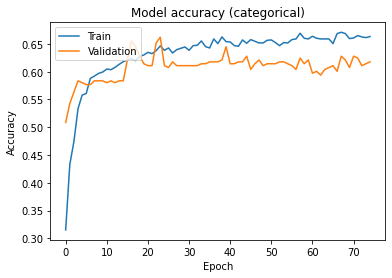

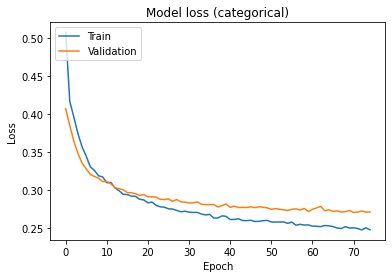

In [ ]:
meta_model = get_nn_model( X_meta_categorical_train.shape[1:],'categorical')
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.00025 )
#losses = { "output_binary": tensorflow.keras.losses.BinaryCrossentropy}
meta_model.compile(optimizer=opt, loss= tensorflow.keras.losses.BinaryCrossentropy(), metrics=['accuracy'] )
print(meta_model.summary())

epochs = 75

stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
#learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=1, factor=0.5, min_lr=0.000001, cooldown=2)
#callbacks=[learning_rate_reduction]

#callbacks = callbacks
meta_history = meta_model.fit( x= np.array(X_meta_categorical_train), y=np.array( y_train_categorical), 
               epochs=epochs, validation_split=0.15 , verbose=1 #, sample_weight=X_train_sample_weights 
               )

plot_train_and_val( meta_history )

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

print ("Random forest (binary):")
rfc_train_x, rfc_val_x, rfc_train_y, rfc_val_y = train_test_split( X_meta_binary_train, y_train_binary, stratify=y_train_binary, random_state=42, test_size=0.2 )
rfc = RandomForestClassifier()
rfc.fit( rfc_train_x, rfc_train_y )
y_pred = rfc.predict( rfc_val_x )
print( "Accuracy: %.4f" % accuracy_score( rfc_val_y, y_pred ) )

print ("Random forest (categorical):")
rfc_train_x, rfc_val_x, rfc_train_y, rfc_val_y = train_test_split( X_meta_categorical_train, y_train_categorical, stratify=y_train_categorical, random_state=42, test_size=0.2 )
rfc = RandomForestClassifier()
rfc.fit( rfc_train_x, rfc_train_y )
y_pred = rfc.predict( rfc_val_x )
print( "Accuracy: %.4f" % accuracy_score( rfc_val_y, y_pred ) )


Random forest (binary):


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy: 0.9054
Random forest (categorical):
Accuracy: 0.7340


## UNET Model

### Helper Functions

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator
from tensorflow.keras.applications.resnet50 import preprocess_input as image_preprocessing_function

class MultiOutputDataGenerator(DirectoryIterator):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        image_files = pd.Series(self.filenames)
        image_files = image_files.str.split("/", expand=True)[1]
        self.image_files = image_files
        #print(image_files)

        # the current dataframe we're processing
        self.current_batch = None

    def _get_batches_of_transformed_samples(self, index_array):
        X, y = super()._get_batches_of_transformed_samples(index_array)

        # match image file names with dataframe
        batch_df = df[df.img_id.isin(self.image_files[index_array])]
        batch_df = batch_df.set_index('img_id').loc[self.image_files[index_array]].reset_index(inplace=False)
        
        y0 = np.array( batch_df.diagnostic_binary )
        y1 = tf.keras.utils.to_categorical( batch_df.diagnostic_categorical, NUM_CLASSES )  # categorical data

        self.current_batch = batch_df
        # debug
        #print(batch_df)
        #print(y0)
        #print(y1)
        if self.class_mode == 'binary':
          return (X, y0)
        elif self.class_mode == 'categorical':
          return(X, y1)
        else:
          return 0

In [ ]:
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SIZE = image_shape[:2]
BATCH_SIZE = 32
SEED=55

# augmented image data generator
datagen = ImageDataGenerator(preprocessing_function=image_preprocessing_function,
                                   validation_split = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode='nearest')

train_batches_binary = MultiOutputDataGenerator( data_directory_binary_train, datagen,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=SEED,
                                                  class_mode="binary"
                                                  )

train_batches_categorical = MultiOutputDataGenerator(data_directory_categorical_train, datagen,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=SEED,
                                                  class_mode="categorical"
                                                  )

# no augmentation for validation data, but keep same seed and validation_split
datagen_val = ImageDataGenerator(preprocessing_function=image_preprocessing_function, validation_split=0.2)

valid_batches_binary = MultiOutputDataGenerator( data_directory_binary_train, datagen_val,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=SEED,
                                                  class_mode="binary"
                                                  )
valid_batches_categorical = MultiOutputDataGenerator( data_directory_categorical_train, datagen_val,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=SEED,
                                                  class_mode="categorical"
                                                  )

Found 1563 images belonging to 2 classes.
Found 1565 images belonging to 6 classes.
Found 390 images belonging to 2 classes.
Found 388 images belonging to 6 classes.


In [ ]:
STEP_SIZE_TRAIN_binary=train_batches_binary.n//train_batches_binary.batch_size
STEP_SIZE_VALID_binary=valid_batches_binary.n//valid_batches_binary.batch_size

print(len(train_batches_binary))
print(len(valid_batches_binary))

49
13


In [ ]:
STEP_SIZE_TRAIN_categorical=train_batches_categorical.n//train_batches_categorical.batch_size
STEP_SIZE_VALID_categorical=valid_batches_categorical.n//valid_batches_categorical.batch_size

print(len(train_batches_categorical))
print(len(valid_batches_categorical))

49
13


In [ ]:
datagen_test = ImageDataGenerator(preprocessing_function=image_preprocessing_function, validation_split=0.2)

test_batches_binary = MultiOutputDataGenerator( data_directory_binary_test, datagen_test,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=SEED,
                                                  class_mode="binary"
                                                  )
test_batches_categorical = MultiOutputDataGenerator( data_directory_categorical_test, datagen_test,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=SEED,
                                                  class_mode="categorical"
                                                  )

STEP_SIZE_test=test_batches_binary.n//test_batches_binary.batch_size
print(len(test_batches_binary))
STEP_SIZE_test=test_batches_categorical.n//test_batches_categorical.batch_size
print(len(test_batches_categorical))

Found 68 images belonging to 2 classes.
Found 66 images belonging to 6 classes.
3
3


In [ ]:
def plot_train_and_val(history,type):

  if type == 'binary':

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy (binary)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss (binary)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

  elif type == 'categorical':

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy (categorical)')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss (categorical)')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
  
  else:
    return 0

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# from https://scikit-learn.org/0.18/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  fig = plt.figure()
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      #print("Normalized confusion matrix")
  else:
      #print('Confusion matrix, without normalization')
      pass

  # print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], '.2f'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close(fig)

from sklearn.metrics import roc_auc_score, accuracy_score

### Model

In [ ]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(type,input_size = (256,256,1)):
    input = Input(input_size)
    #input2 = Input(input_size2)
    #input = concatenate( [input1, input2] )
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(input)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = Dropout(0.5)(conv5)

    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

    x = GlobalAveragePooling2D()(conv10)
    x = Dropout(0.75)(x)  # Regularize with dropout

    output_1 = Dense(1, activation='sigmoid', name='unet_output_binary')( x )
    output_2 = Dense( NUM_CLASSES, activation='softmax', name='unet_output_categorical')( x )

    #outputs = [output_1,output_2]

    if type == 'binary':
      model = Model(inputs = input, outputs=output_1, name='unet_binary_model')
    elif type == 'categorical':
      model = Model(inputs = input, outputs=output_2, name='unet_categorical_model')
    else:
      return 0

    return model

### Binary

In [ ]:
tensorflow.keras.backend.clear_session()

#opt=keras.optimizers.Adam(lr=0.00002)
opt=tf.keras.optimizers.Adam()
#opt=keras.optimizers.SGD(lr=2e-5, momentum=0.9)

unet_model = unet(input_size =image_shape,type = 'binary')
#losses = { "unet_output_binary": tensorflow.keras.losses.BinaryCrossentropy(from_logits=True), 
          #"unet_output_categorical": tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True) }
loss = tensorflow.keras.losses.BinaryCrossentropy(from_logits=True)
unet_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'] )

print(unet_model.summary())


Model: "unet_binary_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 224, 224, 64  36928       ['conv2d[0][0]']                 
                                )                                                 

In [ ]:
epochs = 10

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
 
callbacks=[stop_early,learning_rate_reduction]

unet_history = unet_model.fit(train_batches_binary,
                        steps_per_epoch =STEP_SIZE_TRAIN_binary,
                        validation_data = valid_batches_binary,
                        validation_steps = STEP_SIZE_VALID_binary,
                        epochs= epochs,
                        callbacks=callbacks            
                       )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48/48 [==============================] - 253s 4s/step - loss: 0.6935 - accuracy: 0.5271 - val_loss: 0.6921 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 163s 3s/step - loss: 0.6933 - accuracy: 0.5245 - val_loss: 0.6922 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - ETA: 0s - loss: 0.6915 - accuracy: 0.5258
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
48/48 [==============================] - 163s 3s/step - loss: 0.6915 - accuracy: 0.5258 - val_loss: 0.6921 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 163s 3s/step - loss: 0.6926 - accuracy: 0.5258 - val_loss: 0.6920 - val_accuracy: 0.5260 - lr: 7.0000e-04
Epoch 5/10
48/48 [==============================] - 163s 3s/step - loss: 0.6927 - accuracy: 0.5278 - val_loss: 0.6923 - val_accuracy: 0.5208 - lr: 7.0000e-04
Epoch 6/10
48/48 [==============================] - ETA: 0s - loss: 0.

#### Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


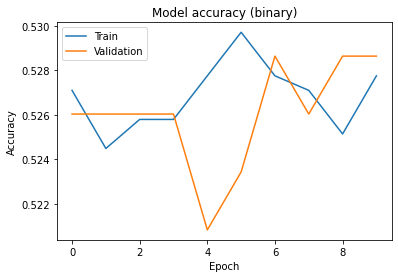

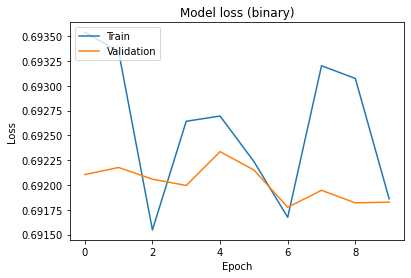

In [ ]:
# evaluate
print(unet_history.history.keys())
plot_train_and_val(unet_history,'binary')

In [ ]:
scores = unet_model.evaluate(test_batches_binary , return_dict=True )

3/3 [==============================] - 8s 3s/step - loss: 0.6918 - accuracy: 0.5294


In [ ]:
scores = unet_model.evaluate(test_batches_binary , return_dict=True )
# get y_true, y_hat
y_pred_binary = unet_model.predict(test_batches_binary)

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid

# get true values from stack test datagen
y_true_binary = test_batches_binary.classes  # this is already in binary mode

3/3 [==============================] - 3s 651ms/step - loss: 0.6918 - accuracy: 0.5294


In [ ]:
import sklearn
print('Test binary loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'loss' ], scores['accuracy'] ) )
print("ROC AUC binary: {}".format( sklearn.metrics.roc_auc_score(y_true_binary, y_pred_binary) ) )

Test binary loss / accuracy: 0.6918 / 0.5294 
ROC AUC binary: 0.5


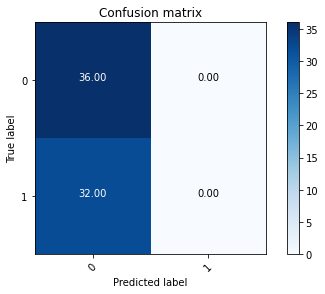

In [ ]:
# confusion matrix
cm = sklearn.metrics.confusion_matrix( y_true_binary, y_pred_binary )
plot_confusion_matrix( cm, classes=list(test_batches_binary.class_indices.keys()) )

In [ ]:
# Sensitivity, Specificity, Precision, F1
# Sensitivity = TP / ( TP+FN )
# Specificity = TN / ( TN+FP )
# Precision (PPV) = TP / ( TP+FP )

# get confusion matrix
tn, fp, fn, tp = confusion_matrix( y_true_binary, y_pred_binary ).ravel()
result={}
#result["accuracy"] = accuracy_score( y_true_binary, y_pred_binary )
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( y_true_binary, y_pred_binary, average="binary",zero_division = 0)

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print(classification_report( y_true_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))


              precision    recall  f1-score   support

           0       0.53      1.00      0.69        36
           1       0.00      0.00      0.00        32

    accuracy                           0.53        68
   macro avg       0.26      0.50      0.35        68
weighted avg       0.28      0.53      0.37        68

PPV: nan
Sensitivity: 0.00
Specificity: 1.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

###Cateogrical

In [ ]:
tensorflow.keras.backend.clear_session()

#opt=keras.optimizers.Adam(lr=0.00002)
opt=tf.keras.optimizers.Adam()
#opt=keras.optimizers.SGD(lr=2e-5, momentum=0.9)

unet_model = unet(input_size =image_shape,type = 'categorical')
#losses = { "unet_output_binary": tensorflow.keras.losses.BinaryCrossentropy(from_logits=True), 
          #"unet_output_categorical": tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True) }
loss = tensorflow.keras.losses.BinaryCrossentropy(from_logits=True)
unet_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'] )

print(unet_model.summary())

Model: "unet_categorical_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 224, 224, 64  36928       ['conv2d[0][0]']                 
                                )                                            

In [ ]:
epochs = 10

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
 
callbacks=[stop_early,learning_rate_reduction]

unet_history = unet_model.fit(train_batches_categorical,
                        steps_per_epoch =STEP_SIZE_TRAIN_categorical,
                        validation_data = valid_batches_categorical,
                        validation_steps = STEP_SIZE_VALID_categorical,
                        epochs= epochs,
                        callbacks=callbacks            
                       )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48/48 [==============================] - 264s 4s/step - loss: 0.7039 - accuracy: 0.3098 - val_loss: 0.6705 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 170s 4s/step - loss: 0.6821 - accuracy: 0.3151 - val_loss: 0.6522 - val_accuracy: 0.1042 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 170s 4s/step - loss: 0.6652 - accuracy: 0.3079 - val_loss: 0.6352 - val_accuracy: 0.1068 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 170s 4s/step - loss: 0.6478 - accuracy: 0.2981 - val_loss: 0.6193 - val_accuracy: 0.1068 - lr: 0.0010
Epoch 5/10
48/48 [==============================] - 170s 4s/step - loss: 0.6301 - accuracy: 0.2988 - val_loss: 0.6047 - val_accuracy: 0.1068 - lr: 0.0010
Epoch 6/10
48/48 [==============================] - 170s 4s/step - loss: 0.6141 - accuracy: 0.2994 - val_loss: 0.5910 - val_accuracy: 0.1068 - lr: 0.0010
Epoch 7/10
48/48 [==============================] - 170s 4s/step - loss: 0.6010 - accur

#### Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


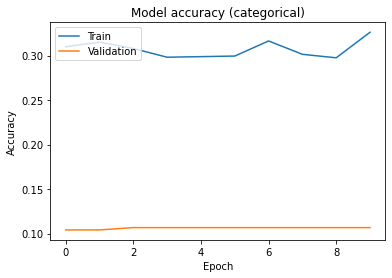

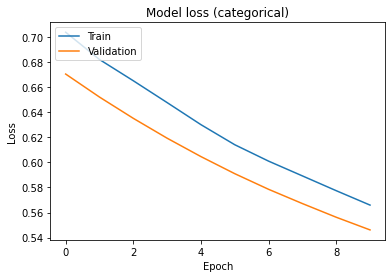

In [ ]:
# evaluate
print(unet_history.history.keys())
plot_train_and_val(unet_history,'categorical' )

In [ ]:
scores = unet_model.evaluate(test_batches_categorical , return_dict=True )

3/3 [==============================] - 6s 2s/step - loss: 0.5461 - accuracy: 0.1061


In [ ]:
print('Test categorical loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'loss' ], scores['accuracy'] ) )
#print("ROC AUC categorical (One vs Rest): {}".format( sklearn.metrics.roc_auc_score( y_true_categorical, y_pred_categorical, multi_class="ovr") ) )

Test categorical loss / accuracy: 0.5461 / 0.1061 


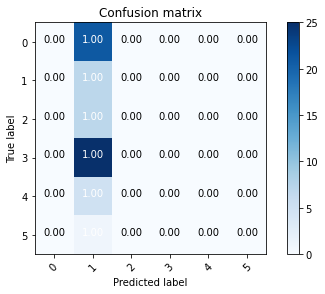

In [ ]:
y_pred_categorical = unet_model.predict(test_batches_categorical)

y_true_categorical = get_df_for_files(test_batches_categorical.filenames ).diagnostic_categorical  # categorical data 
y_pred_categorical = np.argmax( y_pred_categorical, axis=1 )

cm = confusion_matrix( y_true_categorical, y_pred_categorical )
plot_confusion_matrix( cm, classes=[str(x) for x in range(NUM_CLASSES)], normalize=True )

## CNN Model

###Helper Functions

In [ ]:
from tensorflow.keras.optimizers import *
from tensorflow.keras.layers import *
from tensorflow.keras.applications.resnet50 import preprocess_input as image_preprocessing_function
from tensorflow.keras.applications import ResNet50 as base_network
from tensorflow.keras import Model

base = base_network(weights='imagenet', include_top=False, input_shape= image_shape )

def get_cnn( base_network, image_shape,trainable, type):
  "return CNN with frozen base network"
  input_1 = Input( shape=image_shape, name='cnn_input' )
  conv_base = base_network(weights='imagenet',
                    include_top=False,
                    input_shape= input_1.shape[1:] )
  if trainable == True:
    conv_base.trainable = True  
  else:
    conv_base.trainable = False# freeze
  #print(conv_base.summary())
  conv_base_input = conv_base( input_1, training=False )
  #x = layers.Flatten()( conv_base_input )
  #x = layers.Dropout( 0.6 )( x )
  #x = layers.Dense( 256, activation='relu' )( x )
  x = GlobalAveragePooling2D()( conv_base_input )
  x = Dropout(0.75, name='cnn_dropout')(x)  # Regularize with dropout
  output_1 = Dense(1, activation='sigmoid', name='cnn_output_binary')( x )
  output_2 = Dense( NUM_CLASSES, activation='softmax', name='cnn_output_categorical')( x )

  if type == 'binary':
    model = Model(inputs=input_1, outputs=output_1, name='cnn_model')
    return model, conv_base
  elif type == 'categorical':
    model = Model(inputs=input_1, outputs=output_2, name='cnn_model')
    return model, conv_base
  else:
    return 0


###Binary

####Trainable

In [ ]:
tensorflow.keras.backend.clear_session()

#opt=keras.optimizers.Adam(lr=0.00002)
opt=tf.keras.optimizers.Adam()
#opt=keras.optimizers.SGD(lr=2e-5, momentum=0.9)

cnn_model, cnn_model_base = get_cnn(base_network,image_shape,trainable = True,type ='binary')
loss = tensorflow.keras.losses.BinaryCrossentropy(from_logits=True)
cnn_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'] )

print(cnn_model.summary())


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 cnn_dropout (Dropout)       (None, 2048)              0         
                                                                 
 cnn_output_binary (Dense)   (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
________________________________________

In [ ]:
epochs = 10

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
 
callbacks=[stop_early,learning_rate_reduction]

cnn_history = cnn_model.fit(train_batches_binary,
                        steps_per_epoch =STEP_SIZE_TRAIN_binary,
                        validation_data = valid_batches_binary,
                        validation_steps = STEP_SIZE_VALID_binary,
                        epochs= epochs,
                        callbacks=callbacks            
                       )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48/48 [==============================] - 50s 842ms/step - loss: 1.2141 - accuracy: 0.5049 - val_loss: 0.6925 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 37s 768ms/step - loss: 0.6957 - accuracy: 0.5101 - val_loss: 0.6926 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - ETA: 0s - loss: 0.6919 - accuracy: 0.5127
Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
48/48 [==============================] - 37s 767ms/step - loss: 0.6919 - accuracy: 0.5127 - val_loss: 0.6969 - val_accuracy: 0.5260 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 37s 766ms/step - loss: 0.6966 - accuracy: 0.5219 - val_loss: 0.6925 - val_accuracy: 0.5260 - lr: 7.0000e-04
Epoch 5/10
48/48 [==============================] - 37s 767ms/step - loss: 0.6927 - accuracy: 0.5206 - val_loss: 0.6925 - val_accuracy: 0.5208 - lr: 7.0000e-04
Epoch 6/10
48/48 [==============================] - 37s 767m

#### Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


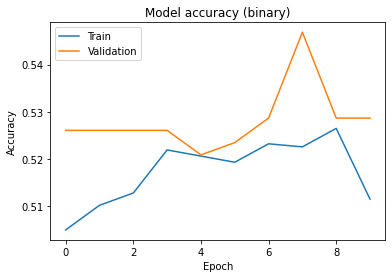

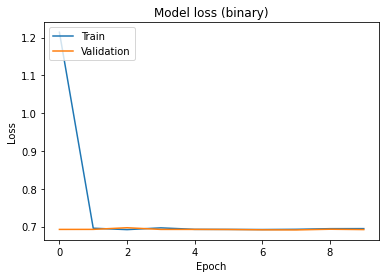

In [ ]:
# evaluate
print(cnn_history.history.keys())
plot_train_and_val(cnn_history,'binary')

In [ ]:
scores = cnn_model.evaluate(test_batches_binary , return_dict=True )

3/3 [==============================] - 1s 421ms/step - loss: 0.6921 - accuracy: 0.5294


In [ ]:
scores = cnn_model.evaluate(test_batches_binary , return_dict=True )
# get y_true, y_hat
y_pred_binary = cnn_model.predict(test_batches_binary)

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid

# get true values from stack test datagen
y_true_binary = test_batches_binary.classes  # this is already in binary mode

3/3 [==============================] - 1s 138ms/step - loss: 0.6921 - accuracy: 0.5294


In [ ]:
import sklearn
print('Test binary loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'loss' ], scores['accuracy'] ) )
print("ROC AUC binary: {}".format( sklearn.metrics.roc_auc_score(y_true_binary, y_pred_binary) ) )

Test binary loss / accuracy: 0.6921 / 0.5294 
ROC AUC binary: 0.5


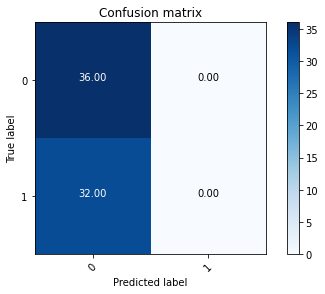

In [ ]:
# confusion matrix
cm = sklearn.metrics.confusion_matrix( y_true_binary, y_pred_binary )
plot_confusion_matrix( cm, classes=list(test_batches_binary.class_indices.keys()) )

In [ ]:
# Sensitivity, Specificity, Precision, F1
# Sensitivity = TP / ( TP+FN )
# Specificity = TN / ( TN+FP )
# Precision (PPV) = TP / ( TP+FP )

# get confusion matrix
tn, fp, fn, tp = confusion_matrix( y_true_binary, y_pred_binary ).ravel()
result={}
#result["accuracy"] = accuracy_score( y_true_binary, y_pred_binary )
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( y_true_binary, y_pred_binary, average="binary",zero_division = 0)

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print(classification_report( y_true_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))


              precision    recall  f1-score   support

           0       0.53      1.00      0.69        36
           1       0.00      0.00      0.00        32

    accuracy                           0.53        68
   macro avg       0.26      0.50      0.35        68
weighted avg       0.28      0.53      0.37        68

PPV: nan
Sensitivity: 0.00
Specificity: 1.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

#### Non-Trainable

In [ ]:
tensorflow.keras.backend.clear_session()

#opt=keras.optimizers.Adam(lr=0.00002)
opt=tf.keras.optimizers.Adam()
#opt=keras.optimizers.SGD(lr=2e-5, momentum=0.9)

cnn_model, cnn_model_base = get_cnn(base_network,image_shape,trainable = False,type ='binary')
loss = tensorflow.keras.losses.BinaryCrossentropy(from_logits=True)
cnn_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'] )

print(cnn_model.summary())


Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 cnn_dropout (Dropout)       (None, 2048)              0         
                                                                 
 cnn_output_binary (Dense)   (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________

In [ ]:
epochs = 10

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
 
callbacks=[stop_early,learning_rate_reduction]

cnn_history = cnn_model.fit(train_batches_binary,
                        steps_per_epoch =STEP_SIZE_TRAIN_binary,
                        validation_data = valid_batches_binary,
                        validation_steps = STEP_SIZE_VALID_binary,
                        epochs= epochs,
                        callbacks=callbacks            
                       )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48/48 [==============================] - 41s 608ms/step - loss: 1.0704 - accuracy: 0.5748 - val_loss: 0.4618 - val_accuracy: 0.7917 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 27s 565ms/step - loss: 0.8127 - accuracy: 0.6310 - val_loss: 0.4306 - val_accuracy: 0.7969 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 27s 563ms/step - loss: 0.7585 - accuracy: 0.6630 - val_loss: 0.4311 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 27s 560ms/step - loss: 0.7365 - accuracy: 0.6604 - val_loss: 0.3981 - val_accuracy: 0.8177 - lr: 0.0010
Epoch 5/10
48/48 [==============================] - 27s 561ms/step - loss: 0.6579 - accuracy: 0.6937 - val_loss: 0.4048 - val_accuracy: 0.8333 - lr: 0.0010
Epoch 6/10
48/48 [==============================] - ETA: 0s - loss: 0.6651 - accuracy: 0.6897
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
48/48 [==============================] - 27s 563ms/step -

#### Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


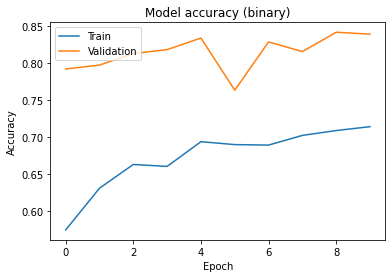

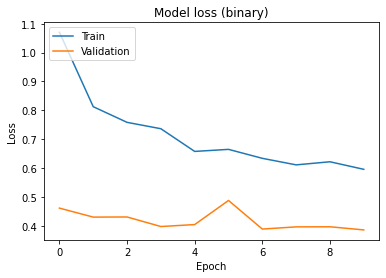

In [ ]:
# evaluate
print(cnn_history.history.keys())
plot_train_and_val(cnn_history,'binary')

In [ ]:
scores = cnn_model.evaluate(test_batches_binary , return_dict=True )

3/3 [==============================] - 1s 413ms/step - loss: 0.4246 - accuracy: 0.7794


In [ ]:
scores = cnn_model.evaluate(test_batches_binary , return_dict=True )
# get y_true, y_hat
y_pred_binary = cnn_model.predict(test_batches_binary)

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid

# get true values from stack test datagen
y_true_binary = test_batches_binary.classes  # this is already in binary mode

3/3 [==============================] - 1s 143ms/step - loss: 0.4246 - accuracy: 0.7794


In [ ]:
import sklearn
print('Test binary loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'loss' ], scores['accuracy'] ) )
print("ROC AUC binary: {}".format( sklearn.metrics.roc_auc_score(y_true_binary, y_pred_binary) ) )

Test binary loss / accuracy: 0.4246 / 0.7794 
ROC AUC binary: 0.36458333333333337


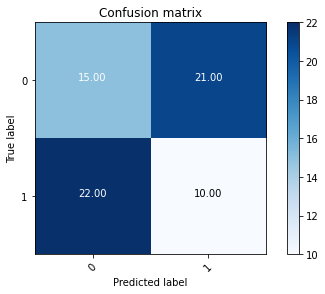

In [ ]:
# confusion matrix
cm = sklearn.metrics.confusion_matrix( y_true_binary, y_pred_binary )
plot_confusion_matrix( cm, classes=list(test_batches_binary.class_indices.keys()) )

In [ ]:
# Sensitivity, Specificity, Precision, F1
# Sensitivity = TP / ( TP+FN )
# Specificity = TN / ( TN+FP )
# Precision (PPV) = TP / ( TP+FP )

# get confusion matrix
tn, fp, fn, tp = confusion_matrix( y_true_binary, y_pred_binary ).ravel()
result={}
#result["accuracy"] = accuracy_score( y_true_binary, y_pred_binary )
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( y_true_binary, y_pred_binary, average="binary",zero_division = 0)

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print(classification_report( y_true_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))


              precision    recall  f1-score   support

           0       0.41      0.42      0.41        36
           1       0.32      0.31      0.32        32

    accuracy                           0.37        68
   macro avg       0.36      0.36      0.36        68
weighted avg       0.37      0.37      0.37        68

PPV: 0.32
Sensitivity: 0.31
Specificity: 0.42


###Categorical

#### Trainable

In [ ]:
tensorflow.keras.backend.clear_session()

#opt=keras.optimizers.Adam(lr=0.00002)
opt=tf.keras.optimizers.Adam()
#opt=keras.optimizers.SGD(lr=2e-5, momentum=0.9)

cnn_model, cnn_model_base = get_cnn(base_network,image_shape,trainable = True,type ='categorical')
loss = tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'] )

print(cnn_model.summary())

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 cnn_dropout (Dropout)       (None, 2048)              0         
                                                                 
 cnn_output_categorical (Den  (None, 6)                12294     
 se)                                                             
                                                                 
Total params: 23,600,006
Trainable params: 23,546,886
Non

In [ ]:
epochs = 10

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
 
callbacks=[stop_early,learning_rate_reduction]

cnn_history = cnn_model.fit(train_batches_categorical,
                        steps_per_epoch =STEP_SIZE_TRAIN_categorical,
                        validation_data = valid_batches_categorical,
                        validation_steps = STEP_SIZE_VALID_categorical,
                        epochs= epochs,
                        callbacks=callbacks            
                       )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48/48 [==============================] - 57s 822ms/step - loss: 2.2006 - accuracy: 0.3053 - val_loss: 1.5319 - val_accuracy: 0.3698 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 39s 811ms/step - loss: 1.5958 - accuracy: 0.3575 - val_loss: 1.5056 - val_accuracy: 0.3203 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 36s 746ms/step - loss: 1.5685 - accuracy: 0.3516 - val_loss: 1.5005 - val_accuracy: 0.3177 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 36s 747ms/step - loss: 1.5494 - accuracy: 0.3725 - val_loss: 1.4892 - val_accuracy: 0.3672 - lr: 0.0010
Epoch 5/10
48/48 [==============================] - 38s 775ms/step - loss: 1.5453 - accuracy: 0.3594 - val_loss: 1.5011 - val_accuracy: 0.3672 - lr: 0.0010
Epoch 6/10
48/48 [==============================] - ETA: 0s - loss: 1.5430 - accuracy: 0.3575
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0007000000332482159.
48/48 [==============================] - 36s 749ms/step -

##### Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


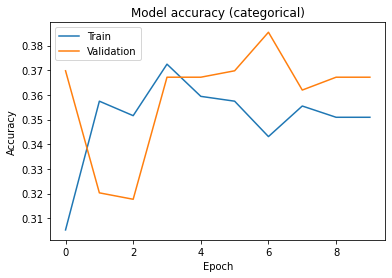

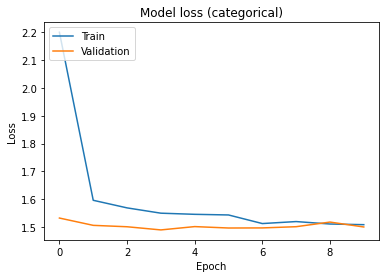

In [ ]:
# evaluate
print(cnn_history.history.keys())
plot_train_and_val(cnn_history,'categorical' )

In [ ]:
scores = cnn_model.evaluate(test_batches_categorical , return_dict=True )

3/3 [==============================] - 1s 355ms/step - loss: 1.4834 - accuracy: 0.3788


In [ ]:
print('Test categorical loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'loss' ], scores['accuracy'] ) )
#print("ROC AUC categorical (One vs Rest): {}".format( sklearn.metrics.roc_auc_score( y_true_categorical, y_pred_categorical, multi_class="ovr") ) )

Test categorical loss / accuracy: 1.4834 / 0.3788 


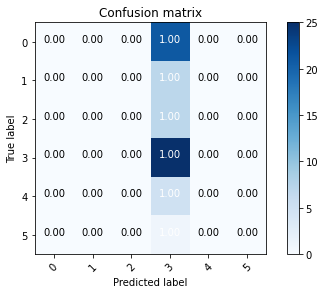

In [ ]:
y_pred_categorical = cnn_model.predict(test_batches_categorical)

y_true_categorical = get_df_for_files(test_batches_categorical.filenames ).diagnostic_categorical  # categorical data 
y_pred_categorical = np.argmax( y_pred_categorical, axis=1 )

cm = confusion_matrix( y_true_categorical, y_pred_categorical )
plot_confusion_matrix( cm, classes=[str(x) for x in range(NUM_CLASSES)], normalize=True )

In [ ]:
print(classification_report(y_true_categorical , y_pred_categorical ) )

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        21
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00         7
           3       0.38      1.00      0.55        25
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.38        66
   macro avg       0.06      0.17      0.09        66
weighted avg       0.14      0.38      0.21        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Non Trainable

In [ ]:
tensorflow.keras.backend.clear_session()

#opt=keras.optimizers.Adam(lr=0.00002)
opt=tf.keras.optimizers.Adam()
#opt=keras.optimizers.SGD(lr=2e-5, momentum=0.9)

cnn_model, cnn_model_base = get_cnn(base_network,image_shape,trainable = False,type ='categorical')
loss = tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True)
cnn_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'] )

print(cnn_model.summary())

Model: "cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cnn_input (InputLayer)      [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 cnn_dropout (Dropout)       (None, 2048)              0         
                                                                 
 cnn_output_categorical (Den  (None, 6)                12294     
 se)                                                             
                                                                 
Total params: 23,600,006
Trainable params: 12,294
Non-tra

In [ ]:
epochs = 10

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
 
callbacks=[stop_early,learning_rate_reduction]

cnn_history = cnn_model.fit(train_batches_categorical,
                        steps_per_epoch =STEP_SIZE_TRAIN_categorical,
                        validation_data = valid_batches_categorical,
                        validation_steps = STEP_SIZE_VALID_categorical,
                        epochs= epochs,
                        callbacks=callbacks            
                       )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48/48 [==============================] - 42s 698ms/step - loss: 2.7387 - accuracy: 0.3607 - val_loss: 1.4214 - val_accuracy: 0.5651 - lr: 0.0010
Epoch 2/10
48/48 [==============================] - 27s 552ms/step - loss: 2.0175 - accuracy: 0.4364 - val_loss: 1.1410 - val_accuracy: 0.6198 - lr: 0.0010
Epoch 3/10
48/48 [==============================] - 28s 580ms/step - loss: 1.8139 - accuracy: 0.4749 - val_loss: 1.0452 - val_accuracy: 0.6536 - lr: 0.0010
Epoch 4/10
48/48 [==============================] - 27s 552ms/step - loss: 1.5864 - accuracy: 0.5055 - val_loss: 1.0088 - val_accuracy: 0.6693 - lr: 0.0010
Epoch 5/10
48/48 [==============================] - 27s 557ms/step - loss: 1.4793 - accuracy: 0.5140 - val_loss: 0.9572 - val_accuracy: 0.6849 - lr: 0.0010
Epoch 6/10
48/48 [==============================] - 28s 581ms/step - loss: 1.3982 - accuracy: 0.5538 - val_loss: 0.9299 - val_accuracy: 0.6979 - lr: 0.0010
Epoch 7/10
48/48 [==============================] - 27s 553ms/step - loss: 

##### Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


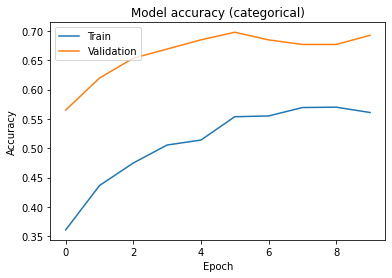

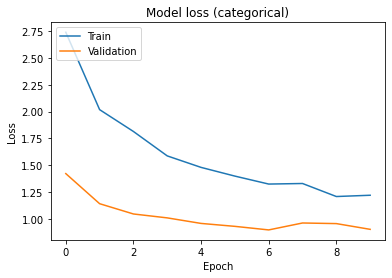

In [ ]:
# evaluate
print(cnn_history.history.keys())
plot_train_and_val(cnn_history,'categorical' )

In [ ]:
scores = cnn_model.evaluate(test_batches_categorical , return_dict=True )

3/3 [==============================] - 1s 125ms/step - loss: 0.8266 - accuracy: 0.6364


In [ ]:
print('Test categorical loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'loss' ], scores['accuracy'] ) )
#print("ROC AUC categorical (One vs Rest): {}".format( sklearn.metrics.roc_auc_score( y_true_categorical, y_pred_categorical, multi_class="ovr") ) )

Test categorical loss / accuracy: 0.8266 / 0.6364 


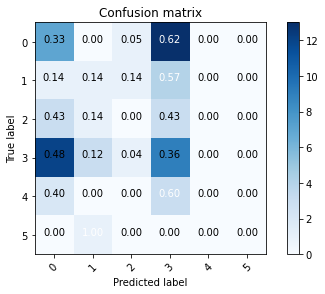

In [ ]:
y_pred_categorical = cnn_model.predict(test_batches_categorical)

y_true_categorical = get_df_for_files(test_batches_categorical.filenames ).diagnostic_categorical  # categorical data 
y_pred_categorical = np.argmax( y_pred_categorical, axis=1 )

cm = confusion_matrix( y_true_categorical, y_pred_categorical )
plot_confusion_matrix( cm, classes=[str(x) for x in range(NUM_CLASSES)], normalize=True )

In [ ]:
print(classification_report(y_true_categorical , y_pred_categorical ) )

              precision    recall  f1-score   support

           0       0.28      0.33      0.30        21
           1       0.17      0.14      0.15         7
           2       0.00      0.00      0.00         7
           3       0.28      0.36      0.32        25
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         1

    accuracy                           0.26        66
   macro avg       0.12      0.14      0.13        66
weighted avg       0.21      0.26      0.23        66



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Stacking 
##with all feautre list concept

### Helper Functions

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator

class MultiOutputDataGenerator(DirectoryIterator):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        image_files = pd.Series(self.filenames)
        image_files = image_files.str.split("/", expand=True)[1]
        self.image_files = image_files
        #print(image_files)

        # the current dataframe we're processing
        self.current_batch = None

    def _get_batches_of_transformed_samples(self, index_array):
        X, y = super()._get_batches_of_transformed_samples(index_array)

        # match image file names with dataframe
        batch_df = df[df.img_id.isin(self.image_files[index_array])]
        batch_df = batch_df.set_index('img_id').loc[self.image_files[index_array]].reset_index(inplace=False)
        
        y0 = np.array( batch_df.diagnostic_binary )
        y1 = tf.keras.utils.to_categorical( batch_df.diagnostic_categorical, NUM_CLASSES )  # categorical data

        self.current_batch = batch_df
        # debug
        #print(batch_df)
        #print(y0)
        #print(y1)

        return (X, [y0,y1])

In [ ]:
# ConcatDataGenerator
#   Combines the image data with the associated metadata, returns two outputs
# based on https://github.com/keras-team/keras/issues/8130#issuecomment-336855177
#   and https://stackoverflow.com/a/54918559

import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, DirectoryIterator

class ConcatDataGenerator(MultiOutputDataGenerator):

  def _get_batches_of_transformed_samples(self, index_array):
    "override, return extra input"
    result = super()._get_batches_of_transformed_samples(index_array)
    sample_weights = self._get_current_batch_sample_weights()
    return (*result, self.current_batch.drop( columns=columns_to_drop, errors='ignore' ), sample_weights )

  def _get_current_batch_sample_weights( self ):
    weight_factors_categorical = { 0:1, 1:1, 2:1, 3:4, 4:8, 5:12 } # using weights
#     weight_factors_categorical = { 0:1, 1:1, 2:1, 3:1, 4:1, 5:1 } # using equal weights for standard model
    return self.current_batch.diagnostic_categorical.map( weight_factors_categorical )

  def get_all( self ):
    "Returns all data from directory as (X1,X2,y1,y2,sample_weights)"
    X1=None
    X2=None
    y1=None
    y2=None
    weights=None
    for _ in range(len( self )):
      data = next( self )
      if X1 is None:
        X1 = np.copy(data[0])
        y1= np.copy( data[1][0] )
        y2 = np.copy( data[1][1] )
        X2= np.copy( data[2] )
        weights = np.copy(data[3] )
      else:
        X1 = np.vstack( (X1, data[0]) )
        y1 = np.concatenate( (y1, data[1][0] ) )
        y2 = np.concatenate( (y2, data[1][1] ) )
        X2 = np.vstack( (X2, data[2]) )
        weights = np.concatenate( ( weights, data[3] ) )
    if self.class_mode == 'binary':
      return(X1,X2,y1,weights)
    elif self.class_mode == 'categorical':
      return(X1,X2,y2,weights)
    else:
      return 0

In [ ]:
# get train and test data for stacked model
datagen_no_augmentation = ImageDataGenerator(preprocessing_function=image_preprocessing_function)

#stack_train_x1, stack_train_x2, stack_train_y = get_stacked_data(train_batches_orig)
stack_train_binary_datagen = ConcatDataGenerator(data_directory_binary_train, datagen_no_augmentation, target_size=IMAGE_SIZE, shuffle=True, class_mode="binary")
stack_train_x1_binary,stack_train_x2_binary, stack_train_y_binary, stack_train_weights_binary = stack_train_binary_datagen.get_all()
del stack_train_binary_datagen

stack_test_binary_datagen = ConcatDataGenerator(data_directory_binary_test, datagen_no_augmentation, target_size=IMAGE_SIZE, shuffle=False, class_mode="binary")
stack_test_x1_binary,stack_test_x2_binary, stack_test_y_binary, _ = stack_test_binary_datagen.get_all()
del stack_test_binary_datagen

#stack_train_x1, stack_train_x2, stack_train_y = get_stacked_data(train_batches_orig)
stack_train_categorical_datagen = ConcatDataGenerator(data_directory_categorical_train, datagen_no_augmentation, target_size=IMAGE_SIZE, shuffle=True, class_mode="categorical")
stack_train_x1_categorical,stack_train_x2_categorical, stack_train_y_categorical, stack_train_weights_categorical = stack_train_categorical_datagen.get_all()
del stack_train_categorical_datagen

stack_test_categorical_datagen = ConcatDataGenerator(data_directory_categorical_test, datagen_no_augmentation, target_size=IMAGE_SIZE, shuffle=False, class_mode="categorical")
stack_test_x1_categorical,stack_test_x2_categorical, stack_test_y_categorical, _ = stack_test_categorical_datagen.get_all()
del stack_test_categorical_datagen

Found 1953 images belonging to 2 classes.
Found 345 images belonging to 2 classes.
Found 1953 images belonging to 6 classes.
Found 345 images belonging to 6 classes.


In [ ]:
print("Balance of train_y classes (binary):")
print(pd.DataFrame(stack_train_y_binary).value_counts())
print("Balance of train_y classes (categorical):")
print(pd.DataFrame(stack_train_y_categorical).value_counts())

Balance of train_y classes (binary):
0    1028
1     925
dtype: int64
Balance of train_y classes (categorical):
0    1    2    3    4    5  
0.0  0.0  0.0  1.0  0.0  0.0    718
1.0  0.0  0.0  0.0  0.0  0.0    621
0.0  1.0  0.0  0.0  0.0  0.0    207
     0.0  1.0  0.0  0.0  0.0    200
          0.0  0.0  1.0  0.0    163
                    0.0  1.0     44
dtype: int64


In [ ]:
print("Balance of test_y classes (binary):")
print(pd.DataFrame(stack_test_y_binary).value_counts())
print("Balance of test_y classes (categorical):")
print(pd.DataFrame(stack_test_y_categorical).value_counts())

Balance of test_y classes (binary):
0    181
1    164
dtype: int64
Balance of test_y classes (categorical):
0    1    2    3    4    5  
0.0  0.0  0.0  1.0  0.0  0.0    127
1.0  0.0  0.0  0.0  0.0  0.0    109
0.0  1.0  0.0  0.0  0.0  0.0     37
     0.0  1.0  0.0  0.0  0.0     35
          0.0  0.0  1.0  0.0     29
                    0.0  1.0      8
dtype: int64


### Binary

In [ ]:
# Stacking
cnn_model.trainable=False
for layer in cnn_model.layers:
  layer.trainable=False
meta_model.trainable=False
for layer in meta_model.layers:
  layer.trainable=False

x = tensorflow.keras.layers.concatenate( [cnn_model.outputs[0], meta_model.outputs[0]] )
x = layers.Dense( 64, activation='relu', name='dense1')( x )
x = layers.Dropout( 0.5, name='d1' )( x )
x = layers.Dense( 1, activation='sigmoid', name='stack_binary')( x )

#x2 = tensorflow.keras.layers.concatenate( [cnn_model.output[1], meta_model.output[1]] )
#x2 = layers.Dense( 64, activation='relu', name='dense2')( x2 )
#x2 = layers.Dropout( 0.5, name='d2' )( x2 )
#x2 = layers.Dense( NUM_CLASSES, activation='softmax', name='stack_categorical')( x2 )

stack_model = Model(inputs=[ cnn_model.input, meta_model.input ], outputs=x)

opt=tensorflow.keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
#opt=tensorflow.keras.optimizers.Adam()

#losses={"stack_binary":"binary_crossentropy", "stack_categorical":"categorical_crossentropy"}
#losses = { "stack_binary": tensorflow.keras.losses.BinaryCrossentropy(from_logits=True), 
#"stack_categorical": tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True) }
loss = tensorflow.keras.losses.BinaryCrossentropy(from_logits=True)

stack_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'] )

print(stack_model.summary())


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cnn_input (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 nn_input (InputLayer)          [(None, 23)]         0           []                               
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['cnn_input[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 64)           1536        ['nn_input[0][0]']         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(stack_model, show_layer_names=False, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

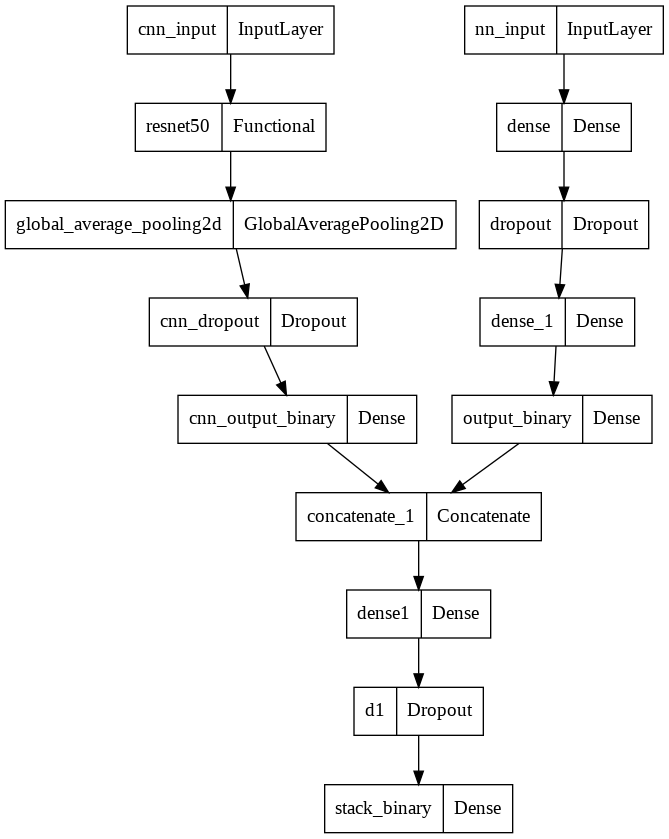

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(stack_model, to_file='stack_model_binary.png')

In [ ]:
# Train the stack model

# class weights:  Keras bug currently prevents specifying weights for multi-output models
#  https://github.com/keras-team/keras/issues/11735
#weights={"stack_binary": binary_weights, "stack_categorical": { i:1. for i in range(NUM_CLASSES) }}

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
callbacks=[stop_early,learning_rate_reduction]
epochs = 100
stack_history = stack_model.fit( x=[stack_train_x1_binary,stack_train_x2_binary], y=stack_train_y_binary,
                        epochs=epochs, validation_split=0.2, callbacks=callbacks) #sample_weight=stack_train_weights_binary)
                         

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


49/49 [==============================] - 21s 334ms/step - loss: 0.6799 - accuracy: 0.6933 - val_loss: 0.6658 - val_accuracy: 0.9182 - lr: 3.0000e-04
Epoch 2/100
49/49 [==============================] - 13s 266ms/step - loss: 0.6609 - accuracy: 0.7663 - val_loss: 0.6368 - val_accuracy: 0.9182 - lr: 3.0000e-04
Epoch 3/100
49/49 [==============================] - 13s 275ms/step - loss: 0.6363 - accuracy: 0.8361 - val_loss: 0.6107 - val_accuracy: 0.9207 - lr: 3.0000e-04
Epoch 4/100
49/49 [==============================] - 14s 277ms/step - loss: 0.6146 - accuracy: 0.8649 - val_loss: 0.5853 - val_accuracy: 0.9258 - lr: 3.0000e-04
Epoch 5/100
49/49 [==============================] - 16s 329ms/step - loss: 0.5935 - accuracy: 0.8681 - val_loss: 0.5601 - val_accuracy: 0.9258 - lr: 3.0000e-04
Epoch 6/100
49/49 [==============================] - 14s 276ms/step - loss: 0.5730 - accuracy: 0.8713 - val_loss: 0.5353 - val_accuracy: 0.9258 - lr: 3.0000e-04
Epoch 7/100
49/49 [===========================

#### Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


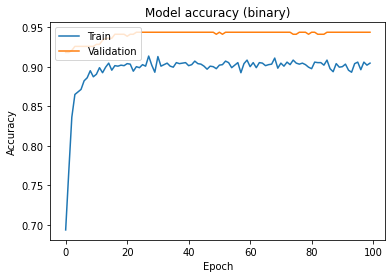

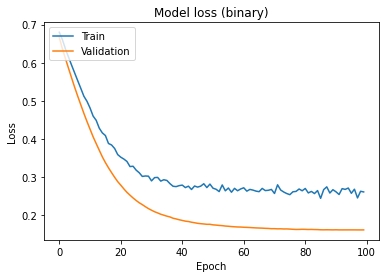

In [ ]:
# evaluate
print(stack_history.history.keys())
plot_train_and_val( stack_history,'binary')

In [ ]:
scores = stack_model.evaluate([stack_test_x1_binary,stack_test_x2_binary], stack_test_y_binary, return_dict=True )

# get y_true, y_hat
y_pred_binary = stack_model.predict( [stack_test_x1_binary,stack_test_x2_binary] )

y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid


11/11 [==============================] - 3s 219ms/step - loss: 0.3156 - accuracy: 0.8667


In [ ]:
import sklearn
print('Test binary loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'loss' ], scores['accuracy'] ) )
print("ROC AUC binary: {}".format( sklearn.metrics.roc_auc_score(stack_test_y_binary, y_pred_binary) ) )

Test binary loss / accuracy: 0.3156 / 0.8667 
ROC AUC binary: 0.8686329335669049


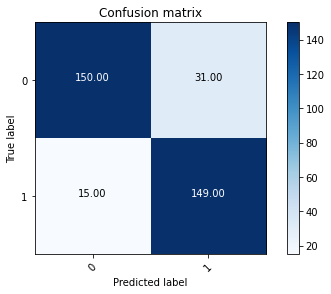

In [ ]:
# confusion matrix
cm = sklearn.metrics.confusion_matrix( stack_test_y_binary, y_pred_binary )
plot_confusion_matrix( cm, classes=list(stack_test_binary_datagen.class_indices.keys()) )

In [ ]:
# Sensitivity, Specificity, Precision, F1
# Sensitivity = TP / ( TP+FN )
# Specificity = TN / ( TN+FP )
# Precision (PPV) = TP / ( TP+FP )

# get confusion matrix
tn, fp, fn, tp = confusion_matrix( stack_test_y_binary, y_pred_binary ).ravel()
result={}
#result["accuracy"] = accuracy_score( y_true_binary, y_pred_binary )
p,r,f,s = sklearn.metrics.precision_recall_fscore_support( stack_test_y_binary, y_pred_binary, average="weighted" )

result["PPV"] = tp / ( tp+fp )
result["Sensitivity"] = tp / ( tp+fn )
result["Specificity"] = tn / ( tn+fp )

print(classification_report( stack_test_y_binary, y_pred_binary ) )
print( "PPV: {:.2f}".format(result["PPV"]))
print( "Sensitivity: {:.2f}".format(result["Sensitivity"]))
print( "Specificity: {:.2f}".format(result["Specificity"]))


              precision    recall  f1-score   support

           0       0.91      0.83      0.87       181
           1       0.83      0.91      0.87       164

    accuracy                           0.87       345
   macro avg       0.87      0.87      0.87       345
weighted avg       0.87      0.87      0.87       345

PPV: 0.83
Sensitivity: 0.91
Specificity: 0.83


### Categorical

In [ ]:
# Stacking
cnn_model.trainable=False
for layer in cnn_model.layers:
  layer.trainable=False
meta_model.trainable=False
for layer in meta_model.layers:
  layer.trainable=False

#x = tensorflow.keras.layers.concatenate( [cnn_model.outputs[0], meta_model.outputs[0]] )
#x = layers.Dense( 64, activation='relu', name='dense1')( x )
#x = layers.Dropout( 0.5, name='d1' )( x )
#x = layers.Dense( 1, activation='sigmoid', name='stack_binary')( x )

x2 = tensorflow.keras.layers.concatenate( [cnn_model.output, meta_model.output[1]] )
x2 = layers.Dense( 64, activation='relu', name='dense2')( x2 )
x2 = layers.Dropout( 0.5, name='d2' )( x2 )
x2 = layers.Dense( NUM_CLASSES, activation='softmax', name='stack_categorical')( x2 )

stack_model = Model(inputs=[ cnn_model.input, meta_model.input ], outputs=x2)

opt=tensorflow.keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)
#opt=tensorflow.keras.optimizers.Adam()

#losses={"stack_binary":"binary_crossentropy", "stack_categorical":"categorical_crossentropy"}
#losses = { "stack_binary": tensorflow.keras.losses.BinaryCrossentropy(from_logits=True), 
#"stack_categorical": tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True) }
loss = tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True)

stack_model.compile(optimizer=opt, loss=loss, metrics=['accuracy'] )

print(stack_model.summary())


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 cnn_input (InputLayer)         [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 nn_input (InputLayer)          [(None, 23)]         0           []                               
                                                                                                  
 resnet50 (Functional)          (None, 7, 7, 2048)   23587712    ['cnn_input[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 64)           1536        ['nn_input[0][0]']         

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
#SVG(model_to_dot(stack_model, show_layer_names=False, show_shapes=True, dpi=64).create(prog='dot', format='svg'))

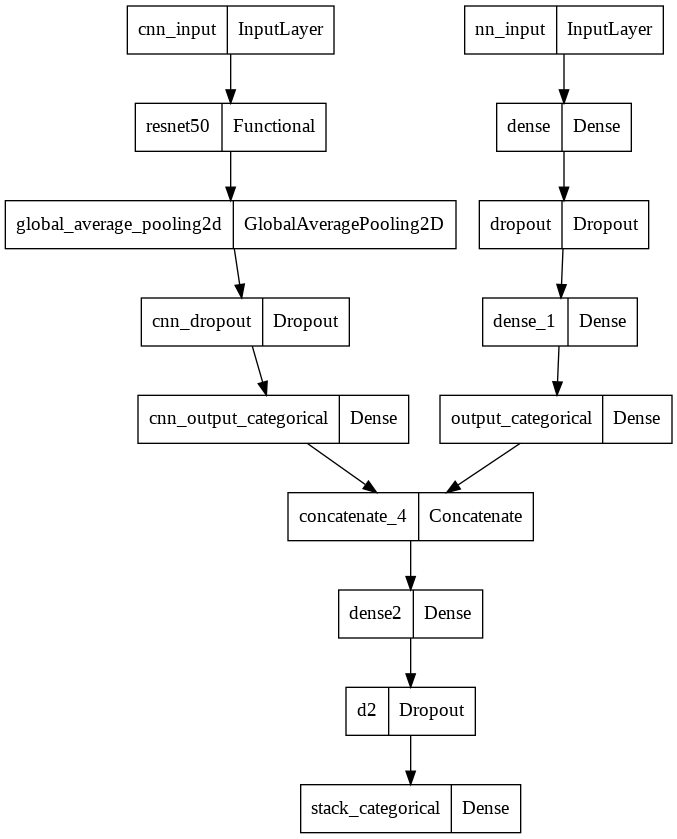

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(stack_model, to_file='stack_model.png')

In [ ]:
# Train the stack model

# callbacks
stop_early = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=7, verbose=1 )
learning_rate_reduction = tensorflow.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1, factor=0.7, 
                                            min_lr=0.000001, cooldown=2)
callbacks=[stop_early,learning_rate_reduction]
epochs = 100
stack_history = stack_model.fit( x=[stack_train_x1_categorical,stack_train_x2_categorical], y=stack_train_y_categorical,
                        epochs=epochs, validation_split=0.2, callbacks=callbacks)
                         

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


49/49 [==============================] - 19s 297ms/step - loss: 1.6659 - accuracy: 0.3636 - val_loss: 1.5835 - val_accuracy: 0.6445 - lr: 3.0000e-04
Epoch 2/100
49/49 [==============================] - 13s 275ms/step - loss: 1.5513 - accuracy: 0.5077 - val_loss: 1.4652 - val_accuracy: 0.6522 - lr: 3.0000e-04
Epoch 3/100
49/49 [==============================] - 13s 272ms/step - loss: 1.4596 - accuracy: 0.5723 - val_loss: 1.3569 - val_accuracy: 0.6624 - lr: 3.0000e-04
Epoch 4/100
49/49 [==============================] - 13s 266ms/step - loss: 1.3524 - accuracy: 0.6255 - val_loss: 1.2563 - val_accuracy: 0.7059 - lr: 3.0000e-04
Epoch 5/100
49/49 [==============================] - 13s 267ms/step - loss: 1.2818 - accuracy: 0.6536 - val_loss: 1.1666 - val_accuracy: 0.7263 - lr: 3.0000e-04
Epoch 6/100
49/49 [==============================] - 13s 266ms/step - loss: 1.1867 - accuracy: 0.6850 - val_loss: 1.0872 - val_accuracy: 0.7289 - lr: 3.0000e-04
Epoch 7/100
49/49 [===========================

#### Evaluation

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


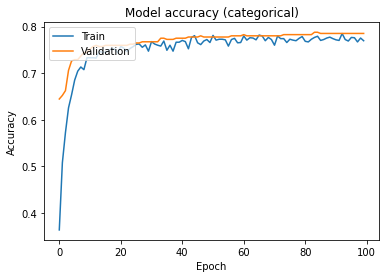

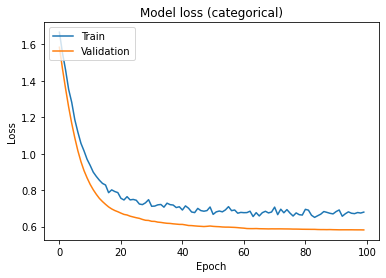

In [ ]:
# evaluate
print(stack_history.history.keys())
plot_train_and_val( stack_history,'categorical')

In [ ]:
scores = stack_model.evaluate([stack_test_x1_categorical,stack_test_x2_categorical], stack_test_y_categorical, return_dict=True )

# get y_true, y_hat
y_pred_categorical = stack_model.predict( [stack_test_x1_categorical,stack_test_x2_categorical] )

#y_pred_binary = ( y_pred_binary >= 0.5).astype("int32") # binarize predictions with a sigmoid

y_true_categorical = get_df_for_files( stack_test_categorical_datagen.filenames ).diagnostic_categorical  # categorical data 
y_pred_categorical = np.argmax( y_pred_categorical, axis=1 )

11/11 [==============================] - 2s 211ms/step - loss: 0.6962 - accuracy: 0.7333


In [ ]:
print('Test categorical loss / accuracy: {:.4f} / {:.4f} '.format( scores[ 'loss' ], scores['accuracy'] ) )
#print("ROC AUC categorical (One vs Rest): {}".format( sklearn.metrics.roc_auc_score( y_true_categorical, y_pred_categorical, multi_class="ovr") ) )

Test categorical loss / accuracy: 0.6962 / 0.7333 


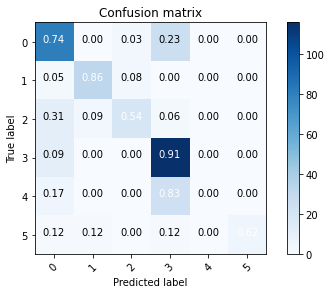

In [ ]:
cm = confusion_matrix( y_true_categorical, y_pred_categorical )
plot_confusion_matrix( cm, classes=[str(x) for x in range(NUM_CLASSES)], normalize=True )

In [ ]:
print(classification_report( y_true_categorical, y_pred_categorical ) )

              precision    recall  f1-score   support

           0       0.73      0.74      0.74       109
           1       0.89      0.86      0.88        37
           2       0.76      0.54      0.63        35
           3       0.69      0.91      0.79       127
           4       0.00      0.00      0.00        29
           5       1.00      0.62      0.77         8

    accuracy                           0.73       345
   macro avg       0.68      0.61      0.63       345
weighted avg       0.68      0.73      0.70       345



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
